In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


# Importing all the necessary libraries

In [ ]:
#from sklearn.datasets import fetch_mldata
import seaborn as sns
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import graphviz 
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb
from xgboost import plot_importance, XGBClassifier, plot_tree
from sklearn.decomposition import PCA

In [ ]:
#%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score 
from sklearn import preprocessing
from sklearn.utils import class_weight

In [ ]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

In [ ]:
#data_set = r"C:\Users\A\Desktop\neural networks\WESAD-data\S2"
s2_path = r"C:\Users\kssin\Downloads\WESAD\S2\S2.pkl"
#s2_path = data_set + 'S2/S2.pkl'

with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [ ]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Done")

Done


In [ ]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")

data frame combined


In [ ]:
display(df.shape)
display(df.info)
display(df.describe)

(4255300, 9)

<bound method DataFrame.info of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
...         ...     ...     ...       ...       ...       ...        ...   
4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   

           c_resp  w_label  
0       -1.148987      0.0

<bound method NDFrame.describe of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
...         ...     ...     ...       ...       ...       ...        ...   
4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   

           c_resp  w_label  
0       -1.148987      0

## Concatenate classes 0, 1, 2, 3, and 4
### Classes 5, 6 and 7 correspond to timed periods in which the participant answered questionnaires, therefore, only classes 0, 1, 2, 3, and 4 will be used. Additionally, the significant imbalance has been eliminated

In [ ]:
loc0 = df.loc[df['w_label'] == 0]
loc1 = df.loc[df['w_label'] == 1]
loc2 = df.loc[df['w_label'] == 2]
loc3 = df.loc[df['w_label'] == 3]
loc4 = df.loc[df['w_label'] == 4]

In [ ]:
c_loc = pd.concat([loc0, loc1, loc2, loc3, loc4])
c_loc

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987,0.0
1,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573,0.0
2,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039,0.0
3,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142,0.0
4,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130951,-1.161194,0.0
...,...,...,...,...,...,...,...,...,...
4111478,0.4378,-0.2348,-0.8380,-0.182602,-0.015793,0.484085,31.926239,-1.609802,4.0
4111479,0.4378,-0.2338,-0.8394,-0.170609,0.000687,0.473404,31.932190,-1.646423,4.0
4111480,0.4388,-0.2338,-0.8386,-0.160812,0.004532,0.463486,31.918823,-1.643372,4.0
4111481,0.4398,-0.2374,-0.8390,-0.156326,0.000595,0.459290,31.932190,-1.661682,4.0


In [ ]:
c_loc.describe().T

,count,mean,std,min,25%,50%,75%,max
c_ax,4165000.0,0.750586,0.175564,0.215000,0.620200,0.853800,0.889800,2.029800
c_ay,4165000.0,-0.133881,0.064515,-0.660000,-0.150800,-0.125600,-0.096800,0.539000
c_az,4165000.0,-0.430928,0.297459,-1.135400,-0.717800,-0.327600,-0.222000,1.246800
c_ecg,4165000.0,0.001211,0.154580,-1.499542,-0.068756,0.008560,0.044724,1.499313
c_emg,4165000.0,-0.002416,0.011704,-0.414963,-0.008377,-0.001602,0.003983,0.300980
c_eda,4165000.0,1.536835,1.249417,0.263214,0.799561,1.163101,1.555252,7.576752
c_temp,4165000.0,30.864528,1.291030,28.045258,30.545776,31.289917,31.815125,34.370392
c_resp,4165000.0,0.052101,2.903610,-27.903748,-1.466370,-0.152588,1.609802,27.378845
w_label,4165000.0,1.097814,1.418904,0.000000,0.000000,0.000000,2.000000,4.000000


#### Plot all classes vs. classes 0,1,2,3,4

4255300 4165000
Number of Rows Removed: 90300


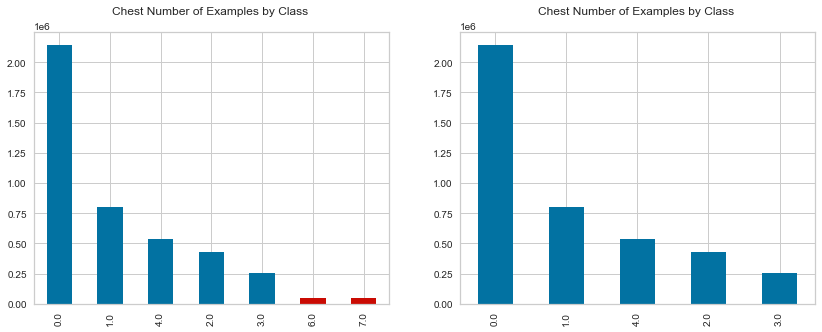

In [ ]:
plt.figure(figsize = (14,5))
plt.subplot(1, 2, 1)
df['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n',
                                     color=['b','b','b','b','b','r','r','r'])
plt.subplot(1, 2, 2)
c_loc['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n')
print((df['w_label'].value_counts().sum()), c_loc['w_label'].value_counts().sum())
print('Number of Rows Removed:', (df['w_label'].value_counts().sum()) - 
      c_loc['w_label'].value_counts().sum());

# Calculating the interquartile range

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_label    2.000000
dtype: float64


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2100456, 9)


In [ ]:
#mean normalization 
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)


In [ ]:
norm_df_out.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
393691,-1.678430,2.251221,-1.593856,-0.326259,-0.675595,3.563482,-4.750996,-0.416753,-0.108962
394476,-1.697992,2.116280,-1.564093,-1.913346,-1.408406,3.553901,-4.753546,0.864869,-0.108962
395154,-1.710440,2.244120,-1.574550,0.843406,1.302484,3.587000,-4.748553,-0.731728,-0.108962
396635,-1.746005,1.952928,-1.606727,-1.452419,0.221203,3.586129,-4.753546,1.121464,-0.108962
402178,-1.712218,2.158892,-1.596269,0.766310,-0.537232,3.553901,-4.571494,0.949722,-0.108962


In [ ]:
norm_df_out.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06
mean,1.260807e-14,-5.727947e-14,-8.812100e-14,-1.637698e-16,-4.467517e-16,3.204129e-13,-4.078556e-13,-2.202471e-15,2.056324e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.534372e+00,-3.814046e+00,-2.495604e+00,-2.629794e+00,-2.776663e+00,-1.856971e+00,-4.756042e+00,-2.715254e+00,-7.712019e-01
25%,-1.750292e-02,-6.535731e-01,-4.483708e-01,-5.757211e-01,-6.448473e-01,-7.211407e-01,-6.176719e-01,-7.154357e-01,-7.712019e-01
50%,4.164009e-01,-8.539912e-02,1.235676e-01,2.470093e-01,6.234153e-02,-1.995722e-02,-1.520821e-01,-1.092451e-01,-7.712019e-01
75%,6.226834e-01,5.537980e-01,5.812790e-01,6.049576e-01,6.619147e-01,3.711377e-01,7.266278e-01,7.331766e-01,5.532788e-01
max,4.150819e+00,3.856315e+00,3.420860e+00,2.775776e+00,2.732236e+00,3.596582e+00,3.874975e+00,2.802235e+00,1.877759e+00


In [ ]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100456 entries, 393691 to 4255299
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 160.3 MB


In [ ]:
norm_df_out.shape

(2100456, 9)

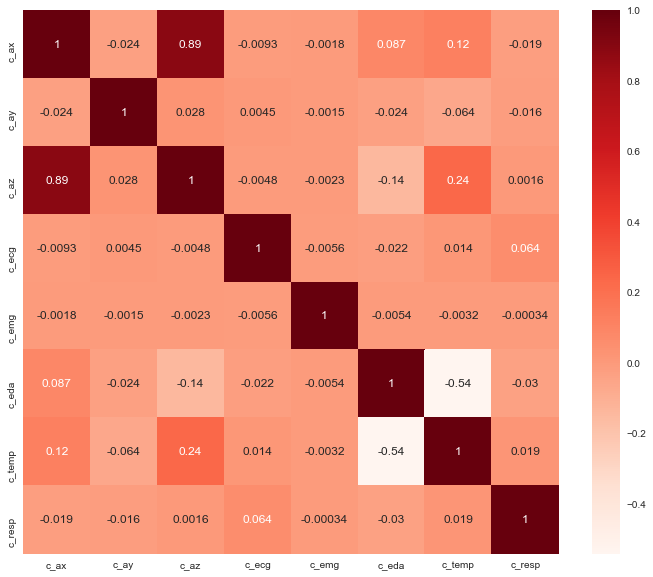

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.000000e+00
c_ax      0.000000e+00
c_ay      0.000000e+00
c_az      0.000000e+00
c_ecg     7.725890e-02
c_emg     3.944850e-33
c_eda     0.000000e+00
c_temp    0.000000e+00
c_resp    0.000000e+00
dtype: float64

In [ ]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(QuadraticDiscriminantAnalysis(),
           k_features=7,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(norm_x, norm_y)
sfs.k_feature_names_     # to get the final set of features

('c_ay', 'c_az', 'c_ecg', 'c_emg', 'c_eda', 'c_temp', 'c_resp')

In [ ]:
norm_x_train

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
4133478,0.660027,0.752660,1.758941,0.330163,-0.952321,-1.248117,0.546329,0.575010
3460205,0.693815,-0.532837,0.941656,0.207360,0.400562,-0.583517,1.041393,-0.941484
1596687,0.430628,1.477083,0.099435,1.049915,1.722698,0.318005,-0.385010,-2.268587
1662482,0.462637,-0.646472,0.176659,-1.163307,-0.634598,0.416432,-0.410607,0.150066
3477323,0.693815,-0.681982,0.973833,0.206809,-0.409118,-0.824794,1.211920,-1.121373
...,...,...,...,...,...,...,...,...
2900373,-1.996745,0.468572,-1.740259,0.169362,0.779779,-0.370984,-0.213580,-0.549124
1906015,0.398618,-0.781413,0.031060,0.435345,-0.275879,2.772582,-0.313368,-1.800198
3353753,0.693815,-0.951866,0.853975,0.152841,0.093089,-0.804760,0.551534,-1.177715
2288976,-0.807065,-1.534244,-1.077422,0.462880,1.420349,0.722165,-0.364510,-0.259944


In [ ]:
norm_y_train

4133478    0.0
3460205    3.0
1596687    2.0
1662482    2.0
3477323    3.0
          ... 
2900373    4.0
1906015    2.0
3353753    3.0
2288976    0.0
2174360    0.0
Name: w_label, Length: 1680364, dtype: float64

In [ ]:
norm_x_test

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3461261,0.697371,-0.575449,0.930395,-0.575721,-0.209260,-0.814342,1.015530,-0.459519
1317536,0.338156,-1.051296,-0.026858,0.886360,0.195580,0.077599,-0.740137,1.018283
1437396,0.555108,1.391855,0.217684,-1.933171,-0.086271,0.154250,-1.387034,-0.190025
1798774,0.457302,-0.639369,0.047148,-0.035495,-1.654385,0.962571,-0.717195,-0.031180
1441534,0.469750,0.624821,0.182290,0.568061,-1.152178,0.102859,-1.389583,-0.915010
...,...,...,...,...,...,...,...,...
1009220,-1.778014,2.371959,-1.650969,0.847812,-0.265630,-0.052186,-2.377747,-0.824048
1077529,-0.031730,0.454368,-0.374365,0.478850,-0.388619,0.263129,-0.732543,-1.202153
1454789,0.476863,0.340733,0.151722,-0.261277,-1.464776,0.068017,-1.415022,-0.828121
3004020,-2.194135,-0.156420,-1.798177,-1.527313,0.031594,-0.617488,-0.146984,-0.059691


In [ ]:
norm_y_test

3461261    3.0
1317536    0.0
1437396    0.0
1798774    2.0
1441534    0.0
          ... 
1009220    1.0
1077529    0.0
1454789    0.0
3004020    4.0
1056455    0.0
Name: w_label, Length: 420092, dtype: float64

In [ ]:
y=df_out.w_label
x=df_out.drop('w_label',axis=1)
#print(x)
#print("\n-----\n")
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_test.shape)
y

(1680364, 8)
(420092,)


393691     1.0
394476     1.0
395154     1.0
396635     1.0
402178     1.0
          ... 
4255293    0.0
4255295    0.0
4255296    0.0
4255297    0.0
4255299    0.0
Name: w_label, Length: 2100456, dtype: float64

In [ ]:
(x_train)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
1089908,0.8314,-0.1190,-0.4028,0.074936,-0.003983,1.200485,31.090057,-2.714539
1133389,0.8330,-0.1384,-0.4062,0.105652,-0.003113,1.212311,31.546204,1.055908
1963232,0.8762,-0.1274,-0.2744,0.008286,-0.005493,2.597427,31.070984,2.674866
3023639,0.5906,-0.1324,-0.7538,-0.170425,-0.018173,0.807571,31.319305,0.184631
3270993,0.8950,-0.0970,0.2106,-0.017715,0.003616,0.782013,31.313416,-2.630615
...,...,...,...,...,...,...,...,...
1947943,0.8618,-0.1410,-0.2906,0.014969,-0.005997,2.614975,31.081268,0.640869
2875096,0.6142,-0.1072,-0.7228,-0.057816,0.000961,0.921249,31.419434,-1.026917
2826540,0.9074,-0.0296,-0.1342,0.038681,-0.001923,0.892639,31.987030,-2.264404
2889526,0.6110,-0.1090,-0.7320,0.080612,0.000137,0.923538,31.385529,-0.572205


In [ ]:
(y_train)

1089908    0.0
1133389    0.0
1963232    2.0
3023639    4.0
3270993    0.0
          ... 
1947943    2.0
2875096    4.0
2826540    0.0
2889526    4.0
3800388    0.0
Name: w_label, Length: 1680364, dtype: float64

In [ ]:
(x_test)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
1209186,0.8286,-0.0902,-0.4002,-0.123276,-0.001053,1.221848,31.825531,0.527954
1904423,0.8794,-0.1414,-0.2862,0.093063,0.007736,2.277756,31.269287,4.722595
1704898,0.8712,-0.1502,-0.2774,0.004623,0.004211,1.253891,31.272247,2.969360
1368239,0.8858,-0.1606,-0.2626,-0.107712,-0.001282,1.108932,30.840912,0.238037
1200387,0.8290,-0.1230,-0.4206,0.024948,-0.002380,1.156998,31.893646,-0.044250
...,...,...,...,...,...,...,...,...
3782777,0.9182,-0.0986,0.0630,-0.003845,0.004074,0.678253,31.859558,-1.347351
1625552,0.8740,-0.1078,-0.2758,-0.114029,0.006042,1.194000,31.360535,4.173279
1663651,0.8658,-0.1534,-0.2598,-0.129822,-0.009338,1.311874,31.219330,2.255249
2402119,0.9170,-0.1866,-0.1446,-0.206314,-0.004623,1.516342,30.621674,2.757263


In [ ]:
(y_test)

1209186    0.0
1904423    2.0
1704898    2.0
1368239    0.0
1200387    0.0
          ... 
3782777    0.0
1625552    2.0
1663651    2.0
2402119    0.0
1402475    0.0
Name: w_label, Length: 420092, dtype: float64

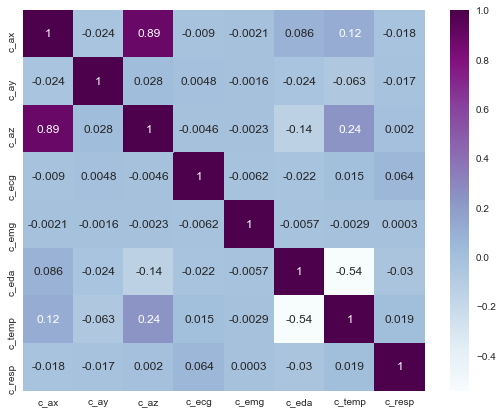

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(x_train.corr(), annot=True, cmap=plt.cm.BuPu);

#### There are no significant correlations in the train set

# XGBoost

In [ ]:
evalSet = [(x_train, y_train), (x_test, y_test)] 

In [ ]:
xg_class = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 50, gradient_based = 0.1, gamma=3, verbosity = 2) 
xg_allChest = xg_class.fit(x_train,y_train, 
                              eval_metric=['merror'], 
                              eval_set = evalSet) 

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15:01:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[15:01:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 554 extra nodes, 168 pruned nodes, max_depth=10
[15:01:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 58 pruned nodes, max_depth=9
[15:01:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 380 extra nodes, 164 pruned nodes, max_depth=10
[15:01:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xg

[15:01:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 188 extra nodes, 112 pruned nodes, max_depth=10
[6]	validation_0-merror:0.09685	validation_1-merror:0.09753
[15:01:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 528 extra nodes, 130 pruned nodes, max_depth=10
[15:01:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 48 pruned nodes, max_depth=9
[15:01:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 332 extra nodes, 64 pruned nodes, max_depth=10
[15:01:29] INFO: C:/buildkite-ag

[15:01:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 162 pruned nodes, max_depth=10
[13]	validation_0-merror:0.05534	validation_1-merror:0.05616
[15:01:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 50 pruned nodes, max_depth=10
[15:01:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 80 pruned nodes, max_depth=8
[15:01:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 282 pruned nodes, max_depth=10
[15:01:51] INFO: C:/buildkite-ag

[15:02:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 80 pruned nodes, max_depth=9
[20]	validation_0-merror:0.03407	validation_1-merror:0.03458
[15:02:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 252 extra nodes, 74 pruned nodes, max_depth=10
[15:02:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 104 pruned nodes, max_depth=8
[15:02:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 158 pruned nodes, max_depth=9
[15:02:12] INFO: C:/buildkite-agent

[15:02:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 72 pruned nodes, max_depth=9
[27]	validation_0-merror:0.02966	validation_1-merror:0.03037
[15:02:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 86 pruned nodes, max_depth=9
[15:02:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 34 pruned nodes, max_depth=10
[15:02:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 266 extra nodes, 126 pruned nodes, max_depth=10
[15:02:35] INFO: C:/buildkite-agent

[15:02:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 82 pruned nodes, max_depth=7
[34]	validation_0-merror:0.02462	validation_1-merror:0.02536
[15:02:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 398 extra nodes, 130 pruned nodes, max_depth=10
[15:02:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 48 pruned nodes, max_depth=10
[15:02:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 88 pruned nodes, max_depth=10
[15:02:56] INFO: C:/buildkite-age

[15:03:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 92 pruned nodes, max_depth=9
[41]	validation_0-merror:0.02146	validation_1-merror:0.02204
[15:03:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 190 pruned nodes, max_depth=7
[15:03:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 78 pruned nodes, max_depth=8
[15:03:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 104 pruned nodes, max_depth=10
[15:03:18] INFO: C:/buildkite-agent

[15:03:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 66 pruned nodes, max_depth=10
[48]	validation_0-merror:0.01901	validation_1-merror:0.01944
[15:03:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 200 pruned nodes, max_depth=7
[15:03:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 148 pruned nodes, max_depth=8
[15:03:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 226 pruned nodes, max_depth=10
[15:03:40] INFO: C:/buildkite-age

In [ ]:
xg_class_pred = xg_class.predict(x_test)
xg_class_report = (classification_report(y_test,
                                         xg_class_pred,
                                         labels=np.unique(xg_class_pred),
                                         digits=4))

print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(y_test, xg_class_pred)))
print('----------------------------------------')
print('------------Classification Report------------')
print(xg_class_report)

----------------------------------------
Balanced Accuracy: 0.9731
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.9824    0.9845    0.9834    245967
           1     0.9997    0.9472    0.9728     10725
           2     0.9740    0.9637    0.9688     63614
           3     0.9815    0.9823    0.9819     47658
           4     0.9755    0.9880    0.9817     52128

    accuracy                         0.9806    420092
   macro avg     0.9826    0.9731    0.9777    420092
weighted avg     0.9806    0.9806    0.9806    420092



### best results

In [ ]:
xg_class = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

xg_allChest = xg_class.fit(x_train,y_train, 
                              eval_metric='merror', 
                              eval_set = evalSet) 

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15:03:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[15:03:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 554 extra nodes, 168 pruned nodes, max_depth=10
[15:03:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 58 pruned nodes, max_depth=9
[15:03:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 380 extra nodes, 164 pruned nodes, max_depth=10
[15:03:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xg

[15:04:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 188 extra nodes, 112 pruned nodes, max_depth=10
[6]	validation_0-merror:0.09685	validation_1-merror:0.09753
[15:04:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 528 extra nodes, 130 pruned nodes, max_depth=10
[15:04:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 48 pruned nodes, max_depth=9
[15:04:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 332 extra nodes, 64 pruned nodes, max_depth=10
[15:04:08] INFO: C:/buildkite-ag

[15:04:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 162 pruned nodes, max_depth=10
[13]	validation_0-merror:0.05534	validation_1-merror:0.05616
[15:04:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 50 pruned nodes, max_depth=10
[15:04:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 80 pruned nodes, max_depth=8
[15:04:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 282 pruned nodes, max_depth=10
[15:04:30] INFO: C:/buildkite-ag

[15:04:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 80 pruned nodes, max_depth=9
[20]	validation_0-merror:0.03407	validation_1-merror:0.03458
[15:04:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 252 extra nodes, 74 pruned nodes, max_depth=10
[15:04:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 104 pruned nodes, max_depth=8
[15:04:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 158 pruned nodes, max_depth=9
[15:04:51] INFO: C:/buildkite-agent

[15:05:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 72 pruned nodes, max_depth=9
[27]	validation_0-merror:0.02966	validation_1-merror:0.03037
[15:05:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 86 pruned nodes, max_depth=9
[15:05:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 34 pruned nodes, max_depth=10
[15:05:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 266 extra nodes, 126 pruned nodes, max_depth=10
[15:05:13] INFO: C:/buildkite-agent

[15:05:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 82 pruned nodes, max_depth=7
[34]	validation_0-merror:0.02462	validation_1-merror:0.02536
[15:05:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 398 extra nodes, 130 pruned nodes, max_depth=10
[15:05:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 48 pruned nodes, max_depth=10
[15:05:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 88 pruned nodes, max_depth=10
[15:05:34] INFO: C:/buildkite-age

[15:05:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 92 pruned nodes, max_depth=9
[41]	validation_0-merror:0.02146	validation_1-merror:0.02204
[15:05:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 190 pruned nodes, max_depth=7
[15:05:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 78 pruned nodes, max_depth=8
[15:05:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 104 pruned nodes, max_depth=10
[15:05:56] INFO: C:/buildkite-agent

[15:06:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 66 pruned nodes, max_depth=10
[48]	validation_0-merror:0.01901	validation_1-merror:0.01944
[15:06:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 200 pruned nodes, max_depth=7
[15:06:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 148 pruned nodes, max_depth=8
[15:06:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 226 pruned nodes, max_depth=10
[15:06:17] INFO: C:/buildkite-age

[15:06:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 64 pruned nodes, max_depth=9
[55]	validation_0-merror:0.01786	validation_1-merror:0.01837
[15:06:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 232 extra nodes, 174 pruned nodes, max_depth=10
[15:06:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 82 pruned nodes, max_depth=9
[15:06:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 156 extra nodes, 188 pruned nodes, max_depth=10
[15:06:38] INFO: C:/buildkite-age

[15:06:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 148 pruned nodes, max_depth=8
[62]	validation_0-merror:0.01755	validation_1-merror:0.01807
[15:06:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 334 pruned nodes, max_depth=8
[15:06:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 170 pruned nodes, max_depth=10
[15:06:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 150 pruned nodes, max_depth=5
[15:07:00] INFO: C:/buildkite-agen

[15:07:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 80 pruned nodes, max_depth=7
[69]	validation_0-merror:0.01620	validation_1-merror:0.01670
[15:07:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 350 extra nodes, 202 pruned nodes, max_depth=10
[15:07:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 32 pruned nodes, max_depth=10
[15:07:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 148 pruned nodes, max_depth=9
[15:07:23] INFO: C:/buildkite-agen

[15:07:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 64 pruned nodes, max_depth=10
[76]	validation_0-merror:0.01489	validation_1-merror:0.01549
[15:07:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 334 pruned nodes, max_depth=10
[15:07:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 90 pruned nodes, max_depth=7
[15:07:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 312 pruned nodes, max_depth=10
[15:07:48] INFO: C:/buildkite-age

[15:08:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 124 pruned nodes, max_depth=7
[83]	validation_0-merror:0.01430	validation_1-merror:0.01493
[15:08:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 284 pruned nodes, max_depth=9
[15:08:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 90 pruned nodes, max_depth=10
[15:08:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 148 pruned nodes, max_depth=10
[15:08:13] INFO: C:/buildkite-age

[15:08:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 96 pruned nodes, max_depth=9
[90]	validation_0-merror:0.01370	validation_1-merror:0.01432
[15:08:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 224 extra nodes, 178 pruned nodes, max_depth=10
[15:08:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 42 pruned nodes, max_depth=9
[15:08:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 236 pruned nodes, max_depth=3
[15:08:39] INFO: C:/buildkite-agent/

[15:08:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 154 pruned nodes, max_depth=10
[97]	validation_0-merror:0.01303	validation_1-merror:0.01370
[15:09:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 250 pruned nodes, max_depth=10
[15:09:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 58 pruned nodes, max_depth=7
[15:09:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 216 pruned nodes, max_depth=9
[15:09:02] INFO: C:/buildkite-age

[15:09:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 74 pruned nodes, max_depth=6
[104]	validation_0-merror:0.01259	validation_1-merror:0.01321
[15:09:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 242 extra nodes, 314 pruned nodes, max_depth=10
[15:09:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 72 pruned nodes, max_depth=10
[15:09:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 100 pruned nodes, max_depth=10
[15:09:25] INFO: C:/buildkite-ag

[15:09:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 90 pruned nodes, max_depth=3
[111]	validation_0-merror:0.01209	validation_1-merror:0.01273
[15:09:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 294 pruned nodes, max_depth=10
[15:09:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 52 pruned nodes, max_depth=4
[15:09:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 188 pruned nodes, max_depth=10
[15:09:47] INFO: C:/buildkite-agen

[15:10:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 94 pruned nodes, max_depth=8
[118]	validation_0-merror:0.01177	validation_1-merror:0.01246
[15:10:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 262 extra nodes, 332 pruned nodes, max_depth=10
[15:10:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 48 pruned nodes, max_depth=6
[15:10:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 152 pruned nodes, max_depth=10
[15:10:09] INFO: C:/buildkite-ag

[15:10:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 178 pruned nodes, max_depth=10
[125]	validation_0-merror:0.01121	validation_1-merror:0.01193
[15:10:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 328 pruned nodes, max_depth=10
[15:10:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 14 pruned nodes, max_depth=3
[15:10:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 188 pruned nodes, max_depth=4
[15:10:43] INFO: C:/buildkite-age

[15:11:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 112 pruned nodes, max_depth=6
[132]	validation_0-merror:0.01091	validation_1-merror:0.01170
[15:11:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 176 extra nodes, 84 pruned nodes, max_depth=10
[15:11:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 46 pruned nodes, max_depth=6
[15:11:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 122 pruned nodes, max_depth=3
[15:11:21] INFO: C:/buildkite-agent

[15:11:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 64 pruned nodes, max_depth=10
[139]	validation_0-merror:0.01046	validation_1-merror:0.01123
[15:11:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 308 pruned nodes, max_depth=7
[15:11:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 16 pruned nodes, max_depth=4
[15:12:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 64 pruned nodes, max_depth=10
[15:12:01] INFO: C:/buildkite-agent

[15:12:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 236 pruned nodes, max_depth=7
[146]	validation_0-merror:0.01020	validation_1-merror:0.01096
[15:12:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 260 pruned nodes, max_depth=9
[15:12:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 12 pruned nodes, max_depth=7
[15:12:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 174 pruned nodes, max_depth=10
[15:12:42] INFO: C:/buildkite-agen

[15:13:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 206 pruned nodes, max_depth=8
[153]	validation_0-merror:0.00989	validation_1-merror:0.01072
[15:13:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 248 pruned nodes, max_depth=10
[15:13:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 10 pruned nodes, max_depth=3
[15:13:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 124 pruned nodes, max_depth=3
[15:13:31] INFO: C:/buildkite-agent

[15:14:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 92 pruned nodes, max_depth=9
[160]	validation_0-merror:0.00965	validation_1-merror:0.01049
[15:14:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 266 extra nodes, 278 pruned nodes, max_depth=10
[15:14:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 40 pruned nodes, max_depth=3
[15:14:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 176 pruned nodes, max_depth=10
[15:14:30] INFO: C:/buildkite-ag

[15:15:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 116 pruned nodes, max_depth=7
[167]	validation_0-merror:0.00940	validation_1-merror:0.01018
[15:15:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 176 extra nodes, 412 pruned nodes, max_depth=10
[15:15:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 46 pruned nodes, max_depth=3
[15:15:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 120 pruned nodes, max_depth=3
[15:15:10] INFO: C:/buildkite-agen

[15:15:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 134 pruned nodes, max_depth=8
[174]	validation_0-merror:0.00915	validation_1-merror:0.01000
[15:15:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 452 pruned nodes, max_depth=10
[15:15:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 12 pruned nodes, max_depth=2
[15:15:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 230 pruned nodes, max_depth=10
[15:15:50] INFO: C:/buildkite-age

[15:16:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 190 pruned nodes, max_depth=7
[181]	validation_0-merror:0.00900	validation_1-merror:0.00980
[15:16:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 204 pruned nodes, max_depth=10
[15:16:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 52 pruned nodes, max_depth=4
[15:16:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 162 pruned nodes, max_depth=10
[15:16:39] INFO: C:/buildkite-age

[15:17:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 234 pruned nodes, max_depth=10
[188]	validation_0-merror:0.00882	validation_1-merror:0.00961
[15:17:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 330 pruned nodes, max_depth=10
[15:17:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 10 pruned nodes, max_depth=2
[15:17:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 136 pruned nodes, max_depth=4
[15:17:18] INFO: C:/buildkite-agent

[15:17:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 138 pruned nodes, max_depth=10
[195]	validation_0-merror:0.00868	validation_1-merror:0.00950
[15:17:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 264 pruned nodes, max_depth=2
[15:17:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 50 pruned nodes, max_depth=0
[15:17:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 192 pruned nodes, max_depth=5
[15:17:56] INFO: C:/buildkite-agent/

[15:18:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 266 pruned nodes, max_depth=7
[202]	validation_0-merror:0.00856	validation_1-merror:0.00938
[15:18:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 262 pruned nodes, max_depth=0
[15:18:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 26 pruned nodes, max_depth=4
[15:18:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 100 pruned nodes, max_depth=10
[15:18:35] INFO: C:/buildkite-agent/

[15:19:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 168 pruned nodes, max_depth=10
[209]	validation_0-merror:0.00851	validation_1-merror:0.00931
[15:19:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 234 pruned nodes, max_depth=4
[15:19:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 16 pruned nodes, max_depth=0
[15:19:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 204 pruned nodes, max_depth=0
[15:19:13] INFO: C:/buildkite-agent/

[15:19:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 134 pruned nodes, max_depth=0
[216]	validation_0-merror:0.00843	validation_1-merror:0.00924
[15:19:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 208 pruned nodes, max_depth=9
[15:19:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 24 pruned nodes, max_depth=0
[15:19:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 118 pruned nodes, max_depth=10
[15:19:51] INFO: C:/buildkite-agent/

[15:20:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 250 pruned nodes, max_depth=10
[223]	validation_0-merror:0.00835	validation_1-merror:0.00916
[15:20:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 204 pruned nodes, max_depth=10
[15:20:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 22 pruned nodes, max_depth=4
[15:20:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 166 pruned nodes, max_depth=3
[15:20:29] INFO: C:/buildkite-agent

[15:21:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 128 pruned nodes, max_depth=7
[230]	validation_0-merror:0.00821	validation_1-merror:0.00906
[15:21:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 396 pruned nodes, max_depth=7
[15:21:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 24 pruned nodes, max_depth=5
[15:21:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 164 pruned nodes, max_depth=2
[15:21:07] INFO: C:/buildkite-agent/

[15:21:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 216 pruned nodes, max_depth=0
[237]	validation_0-merror:0.00814	validation_1-merror:0.00897
[15:21:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 334 pruned nodes, max_depth=10
[15:21:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 4 pruned nodes, max_depth=2
[15:21:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 240 pruned nodes, max_depth=3
[15:21:45] INFO: C:/buildkite-agent/b

[15:22:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 118 pruned nodes, max_depth=5
[244]	validation_0-merror:0.00804	validation_1-merror:0.00887
[15:22:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 376 pruned nodes, max_depth=7
[15:22:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 28 pruned nodes, max_depth=0
[15:22:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 218 pruned nodes, max_depth=3
[15:22:22] INFO: C:/buildkite-agent/b

[15:22:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 102 pruned nodes, max_depth=7
[251]	validation_0-merror:0.00797	validation_1-merror:0.00881
[15:22:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 332 pruned nodes, max_depth=9
[15:22:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 28 pruned nodes, max_depth=0
[15:22:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 236 pruned nodes, max_depth=5
[15:23:00] INFO: C:/buildkite-agent/

[15:23:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 178 pruned nodes, max_depth=4
[258]	validation_0-merror:0.00789	validation_1-merror:0.00871
[15:23:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 320 pruned nodes, max_depth=10
[15:23:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 28 pruned nodes, max_depth=0
[15:23:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 88 pruned nodes, max_depth=10
[15:23:37] INFO: C:/buildkite-agent/

[15:24:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 140 pruned nodes, max_depth=5
[265]	validation_0-merror:0.00784	validation_1-merror:0.00865
[15:24:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 130 pruned nodes, max_depth=10
[15:24:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 28 pruned nodes, max_depth=2
[15:24:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 82 pruned nodes, max_depth=10
[15:24:14] INFO: C:/buildkite-agent

[15:24:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 138 pruned nodes, max_depth=5
[272]	validation_0-merror:0.00774	validation_1-merror:0.00855
[15:24:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 408 pruned nodes, max_depth=9
[15:24:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 20 pruned nodes, max_depth=0
[15:24:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 158 pruned nodes, max_depth=8
[15:24:52] INFO: C:/buildkite-agent/

[15:25:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 110 pruned nodes, max_depth=9
[279]	validation_0-merror:0.00769	validation_1-merror:0.00854
[15:25:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 224 pruned nodes, max_depth=0
[15:25:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 18 pruned nodes, max_depth=4
[15:25:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 260 pruned nodes, max_depth=7
[15:25:28] INFO: C:/buildkite-agent/

[15:26:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 156 pruned nodes, max_depth=3
[286]	validation_0-merror:0.00763	validation_1-merror:0.00848
[15:26:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 322 pruned nodes, max_depth=10
[15:26:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 32 pruned nodes, max_depth=0
[15:26:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 142 pruned nodes, max_depth=7
[15:26:05] INFO: C:/buildkite-agent

[15:26:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 148 pruned nodes, max_depth=5
[293]	validation_0-merror:0.00757	validation_1-merror:0.00846
[15:26:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 188 pruned nodes, max_depth=0
[15:26:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 32 pruned nodes, max_depth=0
[15:26:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 162 pruned nodes, max_depth=0
[15:26:40] INFO: C:/buildkite-agent/bu

In [ ]:
xg_class_pred = xg_class.predict(x_test)
xg_class_report = (classification_report(y_test,
                                         xg_class_pred,
                                         labels=np.unique(xg_class_pred),
                                         digits=4))

print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(y_test, xg_class_pred)))
print('----------------------------------------')
print('------------Classification Report------------')
print(xg_class_report)

----------------------------------------
Balanced Accuracy: 0.9933
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.9948    0.9908    0.9928    245967
           1     0.9996    0.9990    0.9993     10725
           2     0.9845    0.9951    0.9898     63614
           3     0.9892    0.9942    0.9917     47658
           4     0.9856    0.9873    0.9864     52128

    accuracy                         0.9916    420092
   macro avg     0.9907    0.9933    0.9920    420092
weighted avg     0.9916    0.9916    0.9916    420092



C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


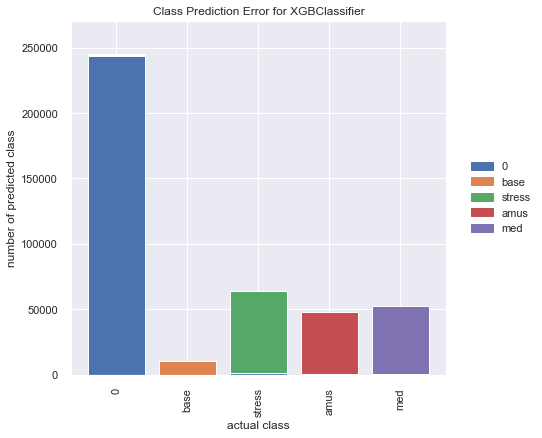

In [ ]:
sns.set(style="darkgrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(xg_class, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=5)

In [ ]:
print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(norm_y, norm_y_out)))
print('----------------------------------------')
print('------------Classification Report------------')
lm=(classification_report(norm_y, norm_y_out, labels=np.unique(norm_y_out), digits=4))
print(lm)

----------------------------------------
Balanced Accuracy: 0.7928
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.8229    0.8862    0.8534   1230433
           1     0.9232    0.9201    0.9216     53659
           2     0.7573    0.6666    0.7091    316935
           3     0.7526    0.6348    0.6887    239191
           4     0.9241    0.8560    0.8888    260238

    accuracy                         0.8216   2100456
   macro avg     0.8360    0.7928    0.8123   2100456
weighted avg     0.8201    0.8216    0.8190   2100456



In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=10)

In [ ]:
print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(norm_y, norm_y_out)))
print('----------------------------------------')
print('------------Classification Report------------')
lm=(classification_report(norm_y, norm_y_out, labels=np.unique(norm_y_out), digits=4))
print(lm)

----------------------------------------
Balanced Accuracy: 0.8843
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.9015    0.9223    0.9118   1230433
           1     0.9140    0.9361    0.9249     53659
           2     0.8694    0.8097    0.8385    316935
           3     0.8512    0.8160    0.8332    239191
           4     0.9304    0.9376    0.9340    260238

    accuracy                         0.8954   2100456
   macro avg     0.8933    0.8843    0.8885   2100456
weighted avg     0.8948    0.8954    0.8949   2100456



In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.9,
                max_depth = 5, alpha = 10, n_estimators = 20, gamma=20)

norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=10)

In [ ]:
print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(norm_y, norm_y_out)))
print('----------------------------------------')
print('------------Classification Report------------')
lm=(classification_report(norm_y, norm_y_out, labels=np.unique(norm_y_out), digits=4))
print(lm)

----------------------------------------
Balanced Accuracy: 0.9010
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.9226    0.9015    0.9119   1230433
           1     0.7803    0.9379    0.8519     53659
           2     0.8657    0.8910    0.8782    316935
           3     0.8250    0.8370    0.8309    239191
           4     0.9216    0.9378    0.9296    260238

    accuracy                         0.8980   2100456
   macro avg     0.8630    0.9010    0.8805   2100456
weighted avg     0.8991    0.8980    0.8983   2100456



In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 15, alpha = 10, n_estimators = 70, gamma=10)

norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=10)

In [ ]:
print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(norm_y, norm_y_out)))
print('----------------------------------------')
print('------------Classification Report------------')
lm=(classification_report(norm_y, norm_y_out, labels=np.unique(norm_y_out), digits=4))
print(lm)

----------------------------------------
Balanced Accuracy: 0.8928
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.9112    0.9160    0.9136   1230433
           1     0.9056    0.9376    0.9213     53659
           2     0.8622    0.8437    0.8528    316935
           3     0.8445    0.8262    0.8352    239191
           4     0.9279    0.9408    0.9343    260238

    accuracy                         0.8985   2100456
   macro avg     0.8903    0.8928    0.8914   2100456
weighted avg     0.8981    0.8985    0.8983   2100456



### Feature importance

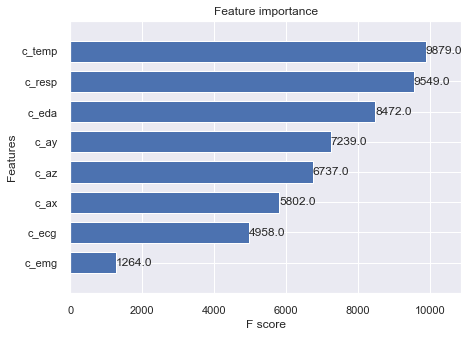

In [ ]:
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (7, 5) 
plot_importance(xg_allChest, importance_type = 'weight', height = 0.7);

# Logistic Regression Base Model

In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg',penalty='none')
clf.fit(x_train,y_train)
y_out = clf.predict(x_test)
print(classification_report(y_test, y_out, digits=4))

'''
(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=3,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) or use slover=saga
'''                 

              precision    recall  f1-score   support

         0.0     0.8220    0.8936    0.8563    245967
         1.0     0.9739    0.8959    0.9333     10725
         2.0     0.7040    0.4016    0.5115     63614
         3.0     0.7887    0.8182    0.8032     47658
         4.0     0.9124    0.9997    0.9540     52128

    accuracy                         0.8238    420092
   macro avg     0.8402    0.8018    0.8117    420092
weighted avg     0.8155    0.8238    0.8122    420092



"\n(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=3,\n                   multi_class='warn', n_jobs=None, penalty='l2',\n                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,\n                   warm_start=False) or use slover=saga\n"

# Logistic Regression + L2 regularization

In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg',penalty='l2',multi_class='auto')
clf.fit(x_train,y_train)
y_out = clf.predict(x_test)
print(classification_report(y_test, y_out, digits=4))

              precision    recall  f1-score   support

         0.0     0.8203    0.8943    0.8557    245967
         1.0     0.9813    0.8883    0.9325     10725
         2.0     0.7045    0.3991    0.5096     63614
         3.0     0.7886    0.8110    0.7996     47658
         4.0     0.9114    0.9999    0.9536     52128

    accuracy                         0.8228    420092
   macro avg     0.8412    0.7985    0.8102    420092
weighted avg     0.8146    0.8228    0.8110    420092



In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg',penalty='l2',multi_class='auto')
y_out = cross_val_predict(clf, norm_x, norm_y, cv=5)
print(classification_report(norm_y_test, y_out, digits=4))



ValueError: Found input variables with inconsistent numbers of samples: [420092, 2100456]

# LDA Basic Implementation

In [ ]:
LDA= LinearDiscriminantAnalysis(solver = 'svd')
y_out = LDA.fit(x_train, y_train).predict(x_test)
#confusion_matrix(y_test, y_out)
print(classification_report(y_test, y_out, digits=4))#target_names=['Not Six', 'Six']

              precision    recall  f1-score   support

         0.0     0.8121    0.8678    0.8390    245935
         1.0     0.9702    0.6358    0.7681     10696
         2.0     0.6248    0.3708    0.4654     63558
         3.0     0.7551    0.8115    0.7823     47916
         4.0     0.8516    1.0000    0.9198     51987

    accuracy                         0.7966    420092
   macro avg     0.8027    0.7372    0.7549    420092
weighted avg     0.7861    0.7966    0.7842    420092



# LDA + Normalization + n_components &  5 Cross Validation

In [ ]:
LDA= LinearDiscriminantAnalysis(solver = 'svd')
#norm_y_out = LDA.fit(norm_x_train, norm_y_train).predict(norm_x_test)
norm_y_out = cross_val_predict(LDA, norm_x, norm_y, cv=5)
print(classification_report(norm_y_test, norm_y_out, digits=4))

ValueError: Found input variables with inconsistent numbers of samples: [420092, 2100456]

# QDA Basic Implementation

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(x_train,y_train)
y_out = qda_clf.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_out, digits=4))#target_names=['Not Six', 'Six']
#IF QDA is best, then data must be Gaussian

              precision    recall  f1-score   support

         0.0     0.9740    0.8949    0.9328    245935
         1.0     0.8703    0.9491    0.9080     10696
         2.0     0.7950    0.9272    0.8560     63558
         3.0     0.8911    0.9860    0.9362     47916
         4.0     0.9386    0.9990    0.9679     51987

    accuracy                         0.9244    420092
   macro avg     0.8938    0.9512    0.9202    420092
weighted avg     0.9305    0.9244    0.9253    420092



In [ ]:
qda_clf = QuadraticDiscriminantAnalysis()
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=5)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8729    0.9031    0.8877   1230433
         1.0     0.8648    0.9317    0.8970     53659
         2.0     0.7485    0.7179    0.7329    316935
         3.0     0.9045    0.7139    0.7980    239191
         4.0     0.9389    0.9985    0.9678    260238

    accuracy                         0.8662   2100456
   macro avg     0.8659    0.8530    0.8567   2100456
weighted avg     0.8657    0.8662    0.8643   2100456



# QDA + Normalization + Cross Validation = 10

# BEST MODEL *****++++****

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)
'''
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
'''    

              precision    recall  f1-score   support

         0.0     0.9473    0.8943    0.9200   1230433
         1.0     0.8798    0.9427    0.9101     53659
         2.0     0.7799    0.8881    0.8305    316935
         3.0     0.8922    0.9069    0.8995    239191
         4.0     0.9366    0.9985    0.9666    260238

    accuracy                         0.9089   2100456
   macro avg     0.8872    0.9261    0.9053   2100456
weighted avg     0.9127    0.9089    0.9097   2100456



'\nhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict\nhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate\n'

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.5)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8380    0.8037    0.8205   1230433
         1.0     0.9813    0.7941    0.8778     53659
         2.0     0.5829    0.4384    0.5005    316935
         3.0     0.6677    0.9552    0.7860    239191
         4.0     0.8780    1.0000    0.9350    260238

    accuracy                         0.7899   2100456
   macro avg     0.7896    0.7983    0.7840   2100456
weighted avg     0.7887    0.7899    0.7839   2100456



In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.9)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.7625    0.8220    0.7912   1230433
         1.0     0.9929    0.6342    0.7740     53659
         2.0     0.4651    0.3059    0.3690    316935
         3.0     0.6491    0.6136    0.6309    239191
         4.0     0.8525    1.0000    0.9204    260238

    accuracy                         0.7376   2100456
   macro avg     0.7444    0.6751    0.6971   2100456
weighted avg     0.7218    0.7376    0.7248   2100456



In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.7)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.7977    0.8178    0.8076   1230433
         1.0     0.9887    0.7486    0.8521     53659
         2.0     0.5200    0.3503    0.4186    316935
         3.0     0.6728    0.8035    0.7324    239191
         4.0     0.8698    1.0000    0.9304    260238

    accuracy                         0.7664   2100456
   macro avg     0.7698    0.7440    0.7482   2100456
weighted avg     0.7554    0.7664    0.7567   2100456



# QDA + Normalization + Cross Validation = 20

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis()
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9647    0.8873    0.9243   1230433
         1.0     0.8790    0.9432    0.9100     53659
         2.0     0.7730    0.9054    0.8340    316935
         3.0     0.8858    0.9719    0.9269    239191
         4.0     0.9369    0.9990    0.9670    260238

    accuracy                         0.9149   2100456
   macro avg     0.8879    0.9414    0.9124   2100456
weighted avg     0.9211    0.9149    0.9159   2100456



In [ ]:
'''
lm=(classification_report(y, y_out, digits=4))
print(lm)
scores = cross_val_score(qda_clf, x, y, cv=10, scoring='accuracy').mean()
print(scores)

#scoring='mean_squared_error'
'''

"\nlm=(classification_report(y, y_out, digits=4))\nprint(lm)\nscores = cross_val_score(qda_clf, x, y, cv=10, scoring='accuracy').mean()\nprint(scores)\n\n#scoring='mean_squared_error'\n"

In [ ]:
'''
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

y_out = cross_val_predict(qda_clf, x, y, cv=loo)
lm=(classification_report(y, y_out, digits=4))
lm=(classification_report(y, y_out, digits=4))
print(lm)
'''

'\nfrom sklearn.model_selection import LeaveOneOut\nloo = LeaveOneOut()\n\ny_out = cross_val_predict(qda_clf, x, y, cv=loo)\nlm=(classification_report(y, y_out, digits=4))\nlm=(classification_report(y, y_out, digits=4))\nprint(lm)\n'

# KNN + Cross Validation + K=3 + Normalization [ CV = 10, K = 3 ]

In [ ]:
#Do base mdel with test and train data, show improvement in next section with cross validation
knn = KNeighborsClassifier(n_neighbors=3)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)
#https://www.ritchieng.com/machine-learning-cross-validation/

              precision    recall  f1-score   support

         0.0     0.9245    0.8220    0.8702   1230433
         1.0     0.9086    0.8866    0.8974     53659
         2.0     0.7062    0.9154    0.7973    316935
         3.0     0.7487    0.8514    0.7968    239191
         4.0     0.9013    0.9397    0.9201    260238

    accuracy                         0.8557   2100456
   macro avg     0.8379    0.8830    0.8564   2100456
weighted avg     0.8683    0.8557    0.8577   2100456



# KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9545    0.8799    0.9157   1230433
         1.0     0.9155    0.9165    0.9160     53659
         2.0     0.8234    0.9416    0.8785    316935
         3.0     0.8043    0.9206    0.8585    239191
         4.0     0.9060    0.9620    0.9332    260238

    accuracy                         0.9049   2100456
   macro avg     0.8807    0.9241    0.9004   2100456
weighted avg     0.9106    0.9049    0.9057   2100456



# KNN + Cross Validation + K=10 + Normalization [ CV = 10, K = 10 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9249    0.8253    0.8723   1230433
         1.0     0.9246    0.8831    0.9034     53659
         2.0     0.7107    0.9127    0.7992    316935
         3.0     0.7492    0.8527    0.7976    239191
         4.0     0.9024    0.9430    0.9222    260238

    accuracy                         0.8577   2100456
   macro avg     0.8423    0.8834    0.8589   2100456
weighted avg     0.8698    0.8577    0.8597   2100456



# KNN + Cross Validation [ CV = 10, K = 20 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9295    0.8213    0.8720   1230433
         1.0     0.9454    0.8815    0.9123     53659
         2.0     0.7058    0.9185    0.7982    316935
         3.0     0.7441    0.8621    0.7988    239191
         4.0     0.9030    0.9498    0.9258    260238

    accuracy                         0.8580   2100456
   macro avg     0.8456    0.8866    0.8614   2100456
weighted avg     0.8718    0.8580    0.8602   2100456



# KNN + Cross Validation [ CV = 10, K = 30 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9321    0.8199    0.8724   1230433
         1.0     0.9605    0.8802    0.9186     53659
         2.0     0.7034    0.9201    0.7973    316935
         3.0     0.7430    0.8689    0.8010    239191
         4.0     0.9037    0.9537    0.9280    260238

    accuracy                         0.8587   2100456
   macro avg     0.8485    0.8885    0.8635   2100456
weighted avg     0.8732    0.8587    0.8610   2100456



# KNN + Cross Validation [ CV = 10, K = 40 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=40)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9338    0.8191    0.8727   1230433
         1.0     0.9673    0.8792    0.9211     53659
         2.0     0.7017    0.9208    0.7964    316935
         3.0     0.7433    0.8738    0.8033    239191
         4.0     0.9042    0.9564    0.9296    260238

    accuracy                         0.8592   2100456
   macro avg     0.8501    0.8899    0.8646   2100456
weighted avg     0.8743    0.8592    0.8616   2100456



# KNN + Cross Validation [ CV = 10, K = 60 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=60)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9367    0.8185    0.8736   1230433
         1.0     0.9745    0.8774    0.9234     53659
         2.0     0.6999    0.9215    0.7956    316935
         3.0     0.7447    0.8825    0.8078    239191
         4.0     0.9046    0.9606    0.9318    260238

    accuracy                         0.8604   2100456
   macro avg     0.8521    0.8921    0.8664   2100456
weighted avg     0.8761    0.8604    0.8628   2100456



# KNN + Cross Validation [ CV = 10, K = 100 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9407    0.8172    0.8746   1230433
         1.0     0.9775    0.8741    0.9229     53659
         2.0     0.6977    0.9214    0.7941    316935
         3.0     0.7461    0.8951    0.8139    239191
         4.0     0.9049    0.9666    0.9347    260238

    accuracy                         0.8618   2100456
   macro avg     0.8534    0.8949    0.8680   2100456
weighted avg     0.8784    0.8618    0.8642   2100456



# Simple Decision Tree + Depth = 5

In [ ]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_i = clf.fit(x_train,y_train)

y_out_i = clf_i.predict(x_test)

lm_i=(classification_report(y_test, y_out_i, digits=4))
print(lm_i)

 

              precision    recall  f1-score   support

         0.0     0.9637    0.9292    0.9461    245935
         1.0     0.9988    0.9575    0.9777     10696
         2.0     0.8735    0.9942    0.9300     63558
         3.0     0.8450    0.8728    0.8587     47916
         4.0     0.9877    0.9661    0.9768     51987

    accuracy                         0.9379    420092
   macro avg     0.9337    0.9440    0.9379    420092
weighted avg     0.9403    0.9379    0.9383    420092



# Displaying and Drwaing the Tree

[Text(0.47767857142857145, 0.9166666666666666, 'X[2] <= -0.636\nentropy = 1.729\nsamples = 1680364\nvalue = [984498, 42963, 253377, 191275, 208251]'),
 Text(0.24107142857142858, 0.75, 'X[5] <= 1.041\nentropy = 1.001\nsamples = 271417\nvalue = [22527, 40639, 0, 0, 208251]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[6] <= 31.506\nentropy = 0.436\nsamples = 228778\nvalue = [20517, 11, 0, 0, 208250]'),
 Text(0.07142857142857142, 0.4166666666666667, 'X[6] <= 31.307\nentropy = 0.302\nsamples = 219533\nvalue = [11770, 11, 0, 0, 207752]'),
 Text(0.03571428571428571, 0.25, 'X[0] <= 0.571\nentropy = 0.991\nsamples = 23023\nvalue = [9869, 11, 0, 0, 13143]'),
 Text(0.017857142857142856, 0.08333333333333333, 'entropy = 0.986\nsamples = 16112\nvalue = [9169, 0, 0, 0, 6943]'),
 Text(0.05357142857142857, 0.08333333333333333, 'entropy = 0.49\nsamples = 6911\nvalue = [700, 11, 0, 0, 6200]'),
 Text(0.10714285714285714, 0.25, 'X[1] <= -0.138\nentropy = 0.079\nsamples = 196510\nvalue = [1901, 0, 0

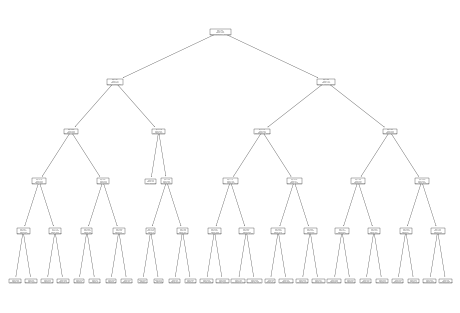

In [ ]:
tree.plot_tree(clf_i) 

In [ ]:
#from sklearn import tree
#https://scikit-learn.org/stable/modules/tree.html

features_ax=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp"]
classes_ay=['0', '1', '2', '3', '4']

dot_data = tree.export_graphviz(clf_i, out_file=None, 
                      feature_names=features_ax,  
                      class_names=classes_ay,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Decision_tree")
graph 


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

# Simple Decision Tree + Depth = 5 + Cross Validation + Normalization

In [ ]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)


norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.9361    0.8394    0.8851   1230433
         1.0     0.8010    0.9360    0.8632     53659
         2.0     0.8695    0.9808    0.9218    316935
         3.0     0.6209    0.7785    0.6908    239191
         4.0     0.9100    0.9685    0.9384    260238

    accuracy                         0.8723   2100456
   macro avg     0.8275    0.9007    0.8599   2100456
weighted avg     0.8835    0.8723    0.8746   2100456



# Simple Decision Tree + Depth = 7 + Normalization + Cross Validation

In [ ]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.9182    0.8495    0.8825   1230433
         1.0     0.7993    0.9444    0.8658     53659
         2.0     0.8734    0.8884    0.8809    316935
         3.0     0.6494    0.8274    0.7277    239191
         4.0     0.9080    0.9478    0.9275    260238

    accuracy                         0.8674   2100456
   macro avg     0.8297    0.8915    0.8569   2100456
weighted avg     0.8765    0.8674    0.8698   2100456



# Simple Decision Tree + Normalization + Cross Validation

## Criterion = Gini, Max_depth = 5, CV = 10

In [ ]:

clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.8866    0.8848    0.8857   1230433
         1.0     0.9702    0.9373    0.9535     53659
         2.0     0.8993    0.7566    0.8218    316935
         3.0     0.6914    0.8289    0.7540    239191
         4.0     0.9065    0.9306    0.9184    260238

    accuracy                         0.8661   2100456
   macro avg     0.8708    0.8677    0.8667   2100456
weighted avg     0.8709    0.8661    0.8668   2100456



# SVC + Normalization

In [ ]:
# Create a SVC classifier using a linear kernel
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_out = clf.predict(x_test)
lm_svc=(classification_report(y_test, y_out, digits=4))
print(lm_svc)


# SVM + Normalization + Cross Validation

In [ ]:
##https://scikit-learn.org/stable/modules/svm.html
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
###https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
#https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/

#svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
#1000 iterations take 25 minutes
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', random_state=0, gamma=10, C=100,
              shrinking=True, tol=1.000, cache_size=10) ##(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_out = clf.predict(x_test)
lm_svc=(classification_report(y_test, y_out, digits=4))
print(lm_svc)


# SVM + Normalization + Cross Validation + Gamma = 20

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', random_state=0, gamma=20, C=100,
              shrinking=True, tol=1.000, cache_size=10) ##(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(norm_x_train, norm_y_train)

#Predict the response for test dataset
norm_y_out = clf.predict(norm_x_test)

In [ ]:
lm_svm=(classification_report(norm_y_test, norm_y_out, digits=4))
print(lm_svm)


In [ ]:
norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# PCA Implementation with 4 features + KNN + XGBOOST

In [ ]:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python


pca = PCA(n_components=4)

x_pca=pca.fit_transform(x)
#x_pca = pca.transform(x_pca)
print("original shape:   ", x.shape)
print("transformed shape:", x_pca.shape)

In [ ]:
y

In [ ]:
pca_df = pd.DataFrame(data=x_pca, columns=["PCA-1", "PCA-2", "PCA-3","PCA-4"]) 
pca_df['w_label'] = y.values
print("data frame combined",min(y),max(y))
print(pca_df.shape)

In [ ]:
(pca_df.head())
#print(pca_df["w_label"])

In [ ]:
pca_y = pca_df.w_label
pca_x = pca_df.drop('w_label',axis=1)

pca_x_train,pca_x_test, pca_y_train, pca_y_test = train_test_split(pca_x,pca_y,test_size=0.2)




In [ ]:
pca_x_train

In [ ]:
pca_y_train

In [ ]:
pca_x_test

In [ ]:
pca_y_test

# PCA with 4 features + Simple Decision Tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(pca_x_train, pca_y_train)

#Predict the response for test dataset
pca_y_out = clf.predict(pca_x_test)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_out))
lmIV=(classification_report(pca_y_test, pca_y_out, digits=4))
print(lmIV)


# PCA with 4 features + KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
pca_y_out = cross_val_predict(knn, pca_x, pca_y, cv=20)
lm=(classification_report(pca_y, pca_y_out, digits=4))
#https://www.ritchieng.com/machine-learning-cross-validation/
lm=(classification_report(pca_y, pca_y_out, digits=4))
print(lm)


# PCA with 4 features + XGBOOST

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_train,pca_y_train)

pca_y_out = xg_class.predict(pca_x_test)

lm_xgbIV=(classification_report(pca_y_test, pca_y_out, digits=4))

print(lm_xgbIV)

# PCA with 1 feature

In [ ]:
pca_df_1 = pca_df_2.drop('PCA-2',axis=1)
print(pca_df_1.head())

pca_y = pca_df_1.w_label
pca_x = pca_df_1.drop('w_label',axis=1)

pca_x_trainI,pca_x_testI, pca_y_trainI, pca_y_testI = train_test_split(pca_x,pca_y,test_size=0.2)
pca_x_trainI

# PCA with 1 feature + XGBOOST

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainI,pca_y_trainI)

pca_y_outI = xg_class.predict(pca_x_testI)

lm_xgbI=(classification_report(pca_y_testI, pca_y_outI, digits=4))

print(lm_xgbI)



# PCA with 2 features 

In [ ]:
pca_df_2 = pca_df_3.drop('PCA-3',axis=1)
print(pca_df_2.head())
pca_y = pca_df_2.w_label
pca_x = pca_df_2.drop('w_label',axis=1)

pca_x_trainII,pca_x_testII, pca_y_trainII, pca_y_testII = train_test_split(pca_x,pca_y,test_size=0.2)



In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(pca_x_trainII, pca_y_trainII)

#Predict the response for test dataset
pca_y_outII = clf.predict(pca_x_testII)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_out))
lm=(classification_report(pca_y_testII, pca_y_outII, digits=4))
print(lm)

# PCA with 2 features + XGBOOST

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainII,pca_y_trainII)

pca_y_outII = xg_class.predict(pca_x_testII)

lm_xgbII=(classification_report(pca_y_testII, pca_y_outII, digits=4))

print(lm_xgbII)


# PCA with 3 features

In [ ]:
pca_df_3 = pca_df.drop('PCA-4',axis=1)

print(pca_df_3.head())
pca_y = pca_df_3.w_label
pca_x = pca_df_3.drop('w_label',axis=1)

pca_x_trainIII,pca_x_testIII, pca_y_trainIII, pca_y_testIII = train_test_split(pca_x,pca_y,test_size=0.2)


# PCA with 3 features + XGBOOST

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainIII,pca_y_trainIII)

pca_y_outIII = xg_class.predict(pca_x_testIII)

lm_xgbIII=(classification_report(pca_y_testIII, pca_y_outIII, digits=4))

print(lm_xgbIII)

In [ ]:
ch_short_out = ch_short[~((ch_short < (Q1 - 1.5 * IQR)) |(ch_short > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ch_short_out.shape)

#mean normalization 
norm_ch_short_out=(ch_short_out-ch_short_out.mean())/ch_short_out.std()

norm_y = ch_short_out.w_label #keep original labels Dont normalize labels
norm_x = norm_ch_short_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

## Individual and Combined Features (On best model)

## XGBoost 

### Model shortChest: Less Electromyogram

In [ ]:
ch_short = c_loc[['c_ax', 'c_ay', 'c_az', 'c_eda', 'c_temp', 'c_resp', 'c_ecg', 'w_label']]
y = ch_short.w_label
x = ch_short.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 
print(x_train.shape)
print(y_test.shape)

(3332000, 7)
(833000,)


In [ ]:
shortChest = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

model_shortChest = shortChest.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12:18:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[12:18:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 482 extra nodes, 26 pruned nodes, max_depth=10
[12:18:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 268 extra nodes, 58 pruned nodes, max_depth=10
[12:18:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 458 extra nodes, 156 pruned nodes, max_depth=10
[12:18:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/x

[12:19:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 346 extra nodes, 118 pruned nodes, max_depth=10
[6]	validation_0-merror:0.03292	validation_1-merror:0.03305
[12:19:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 420 extra nodes, 132 pruned nodes, max_depth=10
[12:19:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 212 extra nodes, 158 pruned nodes, max_depth=10
[12:19:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 218 extra nodes, 184 pruned nodes, max_depth=10
[12:19:21] INFO: C:/buildkit

[12:20:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 284 extra nodes, 114 pruned nodes, max_depth=10
[13]	validation_0-merror:0.03524	validation_1-merror:0.03564
[12:20:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 454 extra nodes, 90 pruned nodes, max_depth=10
[12:20:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 48 pruned nodes, max_depth=10
[12:20:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 264 extra nodes, 106 pruned nodes, max_depth=10
[12:20:11] INFO: C:/buildkite

[12:20:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 174 extra nodes, 92 pruned nodes, max_depth=10
[20]	validation_0-merror:0.02867	validation_1-merror:0.02888
[12:20:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 316 extra nodes, 226 pruned nodes, max_depth=10
[12:20:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 86 pruned nodes, max_depth=10
[12:20:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 66 pruned nodes, max_depth=10
[12:21:01] INFO: C:/buildkite-

[12:21:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 128 pruned nodes, max_depth=10
[27]	validation_0-merror:0.02318	validation_1-merror:0.02342
[12:21:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 340 extra nodes, 76 pruned nodes, max_depth=10
[12:21:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 280 extra nodes, 186 pruned nodes, max_depth=10
[12:21:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 264 pruned nodes, max_depth=10
[12:21:52] INFO: C:/buildkit

[12:22:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 174 pruned nodes, max_depth=10
[34]	validation_0-merror:0.01976	validation_1-merror:0.02004
[12:22:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 260 extra nodes, 192 pruned nodes, max_depth=10
[12:22:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 224 extra nodes, 70 pruned nodes, max_depth=10
[12:22:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 194 pruned nodes, max_depth=10
[12:22:42] INFO: C:/buildkit

[12:23:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 176 pruned nodes, max_depth=10
[41]	validation_0-merror:0.01739	validation_1-merror:0.01765
[12:23:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 476 extra nodes, 190 pruned nodes, max_depth=10
[12:23:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 236 extra nodes, 212 pruned nodes, max_depth=10
[12:23:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 204 pruned nodes, max_depth=10
[12:23:40] INFO: C:/buildkit

[12:24:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 76 pruned nodes, max_depth=10
[48]	validation_0-merror:0.01639	validation_1-merror:0.01664
[12:24:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 382 extra nodes, 162 pruned nodes, max_depth=10
[12:24:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 120 pruned nodes, max_depth=10
[12:24:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 66 pruned nodes, max_depth=10
[12:24:32] INFO: C:/buildkite

[12:25:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 158 pruned nodes, max_depth=10
[55]	validation_0-merror:0.01487	validation_1-merror:0.01508
[12:25:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 344 extra nodes, 122 pruned nodes, max_depth=10
[12:25:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 50 pruned nodes, max_depth=10
[12:25:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 46 pruned nodes, max_depth=10
[12:25:31] INFO: C:/buildkite-

[12:26:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 74 pruned nodes, max_depth=10
[62]	validation_0-merror:0.01395	validation_1-merror:0.01419
[12:26:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 314 extra nodes, 124 pruned nodes, max_depth=10
[12:26:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 42 pruned nodes, max_depth=10
[12:26:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 64 pruned nodes, max_depth=10
[12:26:29] INFO: C:/buildkite-ag

[12:27:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 136 pruned nodes, max_depth=10
[69]	validation_0-merror:0.01329	validation_1-merror:0.01359
[12:27:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 510 pruned nodes, max_depth=10
[12:27:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 126 pruned nodes, max_depth=10
[12:27:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 156 extra nodes, 80 pruned nodes, max_depth=10
[12:27:29] INFO: C:/buildkite

[12:28:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 170 pruned nodes, max_depth=8
[76]	validation_0-merror:0.01258	validation_1-merror:0.01291
[12:28:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 386 extra nodes, 200 pruned nodes, max_depth=10
[12:28:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 118 pruned nodes, max_depth=10
[12:28:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 204 extra nodes, 94 pruned nodes, max_depth=10
[12:28:19] INFO: C:/buildkite-

[12:29:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 140 pruned nodes, max_depth=10
[83]	validation_0-merror:0.01193	validation_1-merror:0.01230
[12:29:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 236 extra nodes, 134 pruned nodes, max_depth=10
[12:29:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 284 pruned nodes, max_depth=9
[12:29:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 146 pruned nodes, max_depth=10
[12:29:21] INFO: C:/buildkite

[12:30:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 168 pruned nodes, max_depth=10
[90]	validation_0-merror:0.01150	validation_1-merror:0.01185
[12:30:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 142 pruned nodes, max_depth=10
[12:30:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 170 pruned nodes, max_depth=10
[12:30:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 68 pruned nodes, max_depth=10
[12:30:20] INFO: C:/buildkite

[12:31:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 42 pruned nodes, max_depth=10
[97]	validation_0-merror:0.01106	validation_1-merror:0.01144
[12:31:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 380 pruned nodes, max_depth=10
[12:31:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 170 pruned nodes, max_depth=10
[12:31:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 126 pruned nodes, max_depth=10
[12:31:10] INFO: C:/buildkite-

[12:31:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 218 pruned nodes, max_depth=7
[104]	validation_0-merror:0.01070	validation_1-merror:0.01109
[12:31:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 116 pruned nodes, max_depth=10
[12:31:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 160 pruned nodes, max_depth=10
[12:32:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 174 pruned nodes, max_depth=10
[12:32:07] INFO: C:/buildkite-

[12:33:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 146 pruned nodes, max_depth=10
[111]	validation_0-merror:0.01039	validation_1-merror:0.01078
[12:33:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 224 extra nodes, 356 pruned nodes, max_depth=10
[12:33:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 36 pruned nodes, max_depth=10
[12:33:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 190 extra nodes, 152 pruned nodes, max_depth=10
[12:33:07] INFO: C:/buildkite

[12:34:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 132 pruned nodes, max_depth=10
[118]	validation_0-merror:0.00996	validation_1-merror:0.01033
[12:34:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 390 pruned nodes, max_depth=10
[12:34:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 178 pruned nodes, max_depth=6
[12:34:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 342 pruned nodes, max_depth=10
[12:34:08] INFO: C:/buildkite-a

[12:34:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 164 pruned nodes, max_depth=10
[125]	validation_0-merror:0.00972	validation_1-merror:0.01015
[12:35:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 308 extra nodes, 280 pruned nodes, max_depth=10
[12:35:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 58 pruned nodes, max_depth=10
[12:35:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 52 pruned nodes, max_depth=10
[12:35:11] INFO: C:/buildkite-

[12:36:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 192 pruned nodes, max_depth=10
[132]	validation_0-merror:0.00938	validation_1-merror:0.00977
[12:36:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 190 extra nodes, 258 pruned nodes, max_depth=10
[12:36:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 152 pruned nodes, max_depth=7
[12:36:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 86 pruned nodes, max_depth=10
[12:36:14] INFO: C:/buildkite-a

[12:37:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 80 pruned nodes, max_depth=10
[139]	validation_0-merror:0.00913	validation_1-merror:0.00954
[12:37:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 232 extra nodes, 84 pruned nodes, max_depth=10
[12:37:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 118 pruned nodes, max_depth=8
[12:37:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 224 pruned nodes, max_depth=10
[12:37:25] INFO: C:/buildkite-ag

[12:38:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 64 pruned nodes, max_depth=10
[146]	validation_0-merror:0.00889	validation_1-merror:0.00931
[12:38:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 376 pruned nodes, max_depth=10
[12:38:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 218 pruned nodes, max_depth=9
[12:38:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 110 pruned nodes, max_depth=10
[12:38:27] INFO: C:/buildkite-a

[12:39:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 128 pruned nodes, max_depth=10
[153]	validation_0-merror:0.00870	validation_1-merror:0.00909
[12:39:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 288 pruned nodes, max_depth=10
[12:39:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 78 pruned nodes, max_depth=10
[12:39:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 94 pruned nodes, max_depth=10
[12:39:31] INFO: C:/buildkite-a

[12:40:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 108 pruned nodes, max_depth=10
[160]	validation_0-merror:0.00858	validation_1-merror:0.00900
[12:40:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 402 pruned nodes, max_depth=9
[12:40:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 168 pruned nodes, max_depth=8
[12:40:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 174 extra nodes, 214 pruned nodes, max_depth=10
[12:40:30] INFO: C:/buildkite-a

[12:41:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 98 pruned nodes, max_depth=10
[167]	validation_0-merror:0.00843	validation_1-merror:0.00886
[12:41:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 240 pruned nodes, max_depth=10
[12:41:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 170 pruned nodes, max_depth=7
[12:41:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 70 pruned nodes, max_depth=10
[12:41:29] INFO: C:/buildkite-ag

[12:42:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 166 pruned nodes, max_depth=10
[174]	validation_0-merror:0.00825	validation_1-merror:0.00869
[12:42:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 334 pruned nodes, max_depth=10
[12:42:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 50 pruned nodes, max_depth=10
[12:42:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 172 pruned nodes, max_depth=9
[12:42:32] INFO: C:/buildkite-

[12:43:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 154 pruned nodes, max_depth=10
[181]	validation_0-merror:0.00812	validation_1-merror:0.00853
[12:43:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 170 pruned nodes, max_depth=10
[12:43:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 60 pruned nodes, max_depth=10
[12:43:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 164 pruned nodes, max_depth=7
[12:43:40] INFO: C:/buildkite-a

[12:44:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 124 pruned nodes, max_depth=10
[188]	validation_0-merror:0.00802	validation_1-merror:0.00844
[12:44:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 204 extra nodes, 242 pruned nodes, max_depth=10
[12:44:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 150 pruned nodes, max_depth=9
[12:44:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 100 pruned nodes, max_depth=10
[12:44:46] INFO: C:/buildkite-

[12:45:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 286 pruned nodes, max_depth=10
[195]	validation_0-merror:0.00789	validation_1-merror:0.00836
[12:45:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 286 pruned nodes, max_depth=10
[12:45:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 22 pruned nodes, max_depth=10
[12:45:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 158 pruned nodes, max_depth=10
[12:45:49] INFO: C:/buildkite

[12:46:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 96 pruned nodes, max_depth=10
[202]	validation_0-merror:0.00778	validation_1-merror:0.00824
[12:46:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 212 extra nodes, 156 pruned nodes, max_depth=10
[12:46:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 76 pruned nodes, max_depth=10
[12:46:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 206 pruned nodes, max_depth=10
[12:46:52] INFO: C:/buildkite-a

[12:47:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 344 pruned nodes, max_depth=5
[209]	validation_0-merror:0.00765	validation_1-merror:0.00812
[12:47:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 246 pruned nodes, max_depth=10
[12:47:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 38 pruned nodes, max_depth=10
[12:47:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 78 pruned nodes, max_depth=10
[12:47:58] INFO: C:/buildkite-ag

[12:48:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 122 pruned nodes, max_depth=10
[216]	validation_0-merror:0.00755	validation_1-merror:0.00807
[12:48:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 244 extra nodes, 232 pruned nodes, max_depth=10
[12:48:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 94 pruned nodes, max_depth=6
[12:48:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 120 pruned nodes, max_depth=10
[12:48:59] INFO: C:/buildkite-a

[12:49:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 250 pruned nodes, max_depth=9
[223]	validation_0-merror:0.00743	validation_1-merror:0.00796
[12:49:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 122 pruned nodes, max_depth=10
[12:49:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 92 pruned nodes, max_depth=6
[12:49:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 102 pruned nodes, max_depth=10
[12:50:00] INFO: C:/buildkite-age

[12:50:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 178 pruned nodes, max_depth=10
[230]	validation_0-merror:0.00734	validation_1-merror:0.00790
[12:50:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 262 pruned nodes, max_depth=10
[12:50:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 88 pruned nodes, max_depth=0
[12:51:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 200 pruned nodes, max_depth=10
[12:51:01] INFO: C:/buildkite-ag

[12:51:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 340 pruned nodes, max_depth=3
[237]	validation_0-merror:0.00723	validation_1-merror:0.00779
[12:51:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 484 pruned nodes, max_depth=8
[12:51:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 110 pruned nodes, max_depth=6
[12:51:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 126 pruned nodes, max_depth=10
[12:51:52] INFO: C:/buildkite-agen

[12:52:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 194 pruned nodes, max_depth=6
[244]	validation_0-merror:0.00716	validation_1-merror:0.00771
[12:52:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 232 pruned nodes, max_depth=10
[12:52:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 66 pruned nodes, max_depth=9
[12:52:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 102 pruned nodes, max_depth=10
[12:52:56] INFO: C:/buildkite-age

[12:53:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 164 pruned nodes, max_depth=9
[251]	validation_0-merror:0.00710	validation_1-merror:0.00765
[12:53:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 284 pruned nodes, max_depth=10
[12:53:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 92 pruned nodes, max_depth=5
[12:53:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 232 pruned nodes, max_depth=10
[12:53:48] INFO: C:/buildkite-ag

[12:54:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 118 pruned nodes, max_depth=9
[258]	validation_0-merror:0.00702	validation_1-merror:0.00758
[12:54:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 178 pruned nodes, max_depth=10
[12:54:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 78 pruned nodes, max_depth=4
[12:54:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 58 pruned nodes, max_depth=10
[12:54:52] INFO: C:/buildkite-agen

[12:55:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 180 pruned nodes, max_depth=7
[265]	validation_0-merror:0.00697	validation_1-merror:0.00755
[12:55:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 252 pruned nodes, max_depth=10
[12:55:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 86 pruned nodes, max_depth=7
[12:55:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 214 pruned nodes, max_depth=10
[12:55:46] INFO: C:/buildkite-a

[12:56:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 180 pruned nodes, max_depth=7
[272]	validation_0-merror:0.00690	validation_1-merror:0.00748
[12:56:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 340 pruned nodes, max_depth=10
[12:56:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 92 pruned nodes, max_depth=4
[12:56:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 134 pruned nodes, max_depth=10
[12:56:45] INFO: C:/buildkite-age

[12:57:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 78 pruned nodes, max_depth=10
[279]	validation_0-merror:0.00684	validation_1-merror:0.00742
[12:57:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 276 pruned nodes, max_depth=10
[12:57:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 98 pruned nodes, max_depth=0
[12:57:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 118 pruned nodes, max_depth=10
[12:57:45] INFO: C:/buildkite-agen

[12:58:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 224 pruned nodes, max_depth=6
[286]	validation_0-merror:0.00680	validation_1-merror:0.00738
[12:58:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 252 pruned nodes, max_depth=10
[12:58:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 106 pruned nodes, max_depth=6
[12:58:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 130 pruned nodes, max_depth=10
[12:58:46] INFO: C:/buildkite-ag

[12:59:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 196 pruned nodes, max_depth=7
[293]	validation_0-merror:0.00675	validation_1-merror:0.00731
[13:00:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 196 pruned nodes, max_depth=10
[13:00:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 72 pruned nodes, max_depth=7
[13:00:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 102 pruned nodes, max_depth=10
[13:00:09] INFO: C:/buildkite-ag

In [ ]:
shortChest_pred = shortChest.predict(x_test)
shortChest_report = (classification_report(y_test, 
                                         shortChest_pred, 
                                         labels = np.unique(shortChest_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, shortChest_pred))
print('---------------------------------------')
print('------------All Chest less EMG Classification Report------------')
print(shortChest_report)

Balanced Accuracy: 0.9933706267285547
---------------------------------------
------------All Chest less EMG Classification Report------------
              precision    recall  f1-score   support

           0     0.9950    0.9908    0.9929    428626
           1     0.9995    0.9993    0.9994    160114
           2     0.9825    0.9928    0.9876     86129
           3     0.9900    0.9945    0.9923     50777
           4     0.9831    0.9894    0.9862    107354

    accuracy                         0.9927    833000
   macro avg     0.9900    0.9934    0.9917    833000
weighted avg     0.9927    0.9927    0.9927    833000



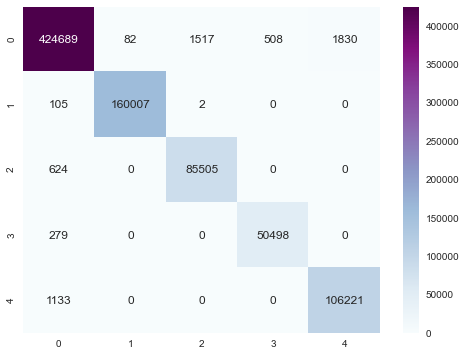

In [ ]:
cm = confusion_matrix(y_test, shortChest_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu );

### Classification Prediction Error 

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


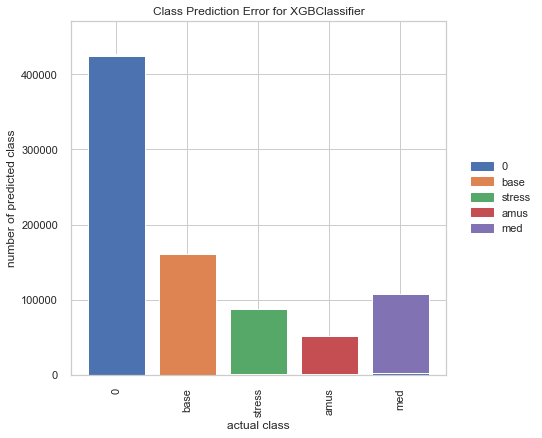

In [ ]:
sns.set(style="whitegrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(shortChest, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

### Multiclass ROC AUC Score 

In [ ]:
def multiclass_roc_auc_score(y_test, shortChest_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(shortChest_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, shortChest_pred)

print('All Chest less EMG')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))  

All Chest less EMG
-------------------
AUC: 99.56%


### Model ch_lessAcc: Chest Less Accelerometer

In [ ]:
lessAcc = c_loc[['c_eda', 'c_temp', 'c_resp', 'c_emg', 'c_ecg', 'w_label']]
y = lessAcc.w_label
x = lessAcc.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 
print(x_train.shape)
print(y_test.shape)

(3332000, 5)
(833000,)


In [ ]:
ch_lessAcc = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

model_ch_lessAcc = ch_lessAcc.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[13:37:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[13:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 304 extra nodes, 36 pruned nodes, max_depth=10
[13:37:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 128 pruned nodes, max_depth=9
[13:37:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 172 extra nodes, 182 pruned nodes, max_depth=10
[13:37:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xg

[13:38:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 8 pruned nodes, max_depth=10
[6]	validation_0-merror:0.29119	validation_1-merror:0.29157
[13:38:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 248 extra nodes, 52 pruned nodes, max_depth=10
[13:38:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 28 pruned nodes, max_depth=10
[13:38:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 208 pruned nodes, max_depth=10
[13:38:20] INFO: C:/buildkite-ag

[13:38:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 138 pruned nodes, max_depth=9
[13]	validation_0-merror:0.25618	validation_1-merror:0.25628
[13:38:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 24 pruned nodes, max_depth=9
[13:38:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 146 pruned nodes, max_depth=10
[13:38:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 16 pruned nodes, max_depth=7
[13:39:01] INFO: C:/buildkite-agent

[13:39:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 46 pruned nodes, max_depth=10
[20]	validation_0-merror:0.21192	validation_1-merror:0.21191
[13:39:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 50 pruned nodes, max_depth=10
[13:39:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 146 pruned nodes, max_depth=9
[13:39:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 162 pruned nodes, max_depth=10
[13:39:42] INFO: C:/buildkite-ag

[13:40:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 116 pruned nodes, max_depth=10
[27]	validation_0-merror:0.19979	validation_1-merror:0.19980
[13:40:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 22 pruned nodes, max_depth=9
[13:40:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 160 pruned nodes, max_depth=10
[13:40:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 16 pruned nodes, max_depth=10
[13:40:23] INFO: C:/buildkite-age

[13:41:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 114 pruned nodes, max_depth=10
[34]	validation_0-merror:0.19229	validation_1-merror:0.19234
[13:41:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 140 pruned nodes, max_depth=10
[13:41:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 82 pruned nodes, max_depth=10
[13:41:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 244 pruned nodes, max_depth=8
[13:41:04] INFO: C:/buildkite-a

[13:41:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 42 pruned nodes, max_depth=10
[41]	validation_0-merror:0.16991	validation_1-merror:0.17005
[13:41:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 236 pruned nodes, max_depth=8
[13:41:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 182 pruned nodes, max_depth=9
[13:41:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 18 pruned nodes, max_depth=10
[13:41:48] INFO: C:/buildkite-agen

[13:42:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 80 pruned nodes, max_depth=9
[48]	validation_0-merror:0.15830	validation_1-merror:0.15834
[13:42:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 136 pruned nodes, max_depth=7
[13:42:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 124 pruned nodes, max_depth=4
[13:42:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 238 pruned nodes, max_depth=10
[13:42:37] INFO: C:/buildkite-agent

[13:43:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 84 pruned nodes, max_depth=8
[55]	validation_0-merror:0.15135	validation_1-merror:0.15123
[13:43:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 150 pruned nodes, max_depth=7
[13:43:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 214 pruned nodes, max_depth=10
[13:43:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 244 pruned nodes, max_depth=9
[13:43:16] INFO: C:/buildkite-agent

[13:43:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 50 pruned nodes, max_depth=10
[62]	validation_0-merror:0.14330	validation_1-merror:0.14327
[13:43:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 272 pruned nodes, max_depth=7
[13:43:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 118 pruned nodes, max_depth=4
[13:43:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 262 pruned nodes, max_depth=8
[13:43:55] INFO: C:/buildkite-agent

[13:44:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 52 pruned nodes, max_depth=10
[69]	validation_0-merror:0.13643	validation_1-merror:0.13637
[13:44:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 332 pruned nodes, max_depth=10
[13:44:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 80 pruned nodes, max_depth=10
[13:44:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 80 pruned nodes, max_depth=10
[13:44:43] INFO: C:/buildkite-a

[13:45:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 354 pruned nodes, max_depth=7
[76]	validation_0-merror:0.12920	validation_1-merror:0.12921
[13:45:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 298 extra nodes, 220 pruned nodes, max_depth=10
[13:45:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 102 pruned nodes, max_depth=4
[13:45:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 172 pruned nodes, max_depth=6
[13:45:22] INFO: C:/buildkite-age

[13:45:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 344 pruned nodes, max_depth=7
[83]	validation_0-merror:0.12406	validation_1-merror:0.12412
[13:46:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 366 pruned nodes, max_depth=10
[13:46:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 70 pruned nodes, max_depth=9
[13:46:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 70 pruned nodes, max_depth=10
[13:46:04] INFO: C:/buildkite-ag

[13:46:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 78 pruned nodes, max_depth=10
[90]	validation_0-merror:0.11918	validation_1-merror:0.11927
[13:46:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 338 pruned nodes, max_depth=6
[13:46:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 82 pruned nodes, max_depth=10
[13:46:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 250 pruned nodes, max_depth=5
[13:46:52] INFO: C:/buildkite-agent

[13:47:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 106 pruned nodes, max_depth=9
[97]	validation_0-merror:0.11490	validation_1-merror:0.11512
[13:47:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 352 pruned nodes, max_depth=5
[13:47:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 170 pruned nodes, max_depth=10
[13:47:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 248 pruned nodes, max_depth=5
[13:47:31] INFO: C:/buildkite-agen

[13:48:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 314 pruned nodes, max_depth=7
[104]	validation_0-merror:0.11207	validation_1-merror:0.11224
[13:48:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 94 pruned nodes, max_depth=10
[13:48:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 82 pruned nodes, max_depth=8
[13:48:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 264 pruned nodes, max_depth=6
[13:48:10] INFO: C:/buildkite-agen

[13:48:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 134 pruned nodes, max_depth=10
[111]	validation_0-merror:0.11010	validation_1-merror:0.11013
[13:48:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 220 pruned nodes, max_depth=5
[13:48:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 116 pruned nodes, max_depth=3
[13:48:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 222 pruned nodes, max_depth=4
[13:48:49] INFO: C:/buildkite-age

[13:49:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 304 pruned nodes, max_depth=8
[118]	validation_0-merror:0.10800	validation_1-merror:0.10810
[13:49:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 202 pruned nodes, max_depth=4
[13:49:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 152 pruned nodes, max_depth=6
[13:49:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 212 pruned nodes, max_depth=5
[13:49:28] INFO: C:/buildkite-agen

[13:50:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 114 pruned nodes, max_depth=8
[125]	validation_0-merror:0.10591	validation_1-merror:0.10605
[13:50:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 194 pruned nodes, max_depth=5
[13:50:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 84 pruned nodes, max_depth=4
[13:50:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 258 pruned nodes, max_depth=10
[13:50:17] INFO: C:/buildkite-agen

[13:51:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 144 pruned nodes, max_depth=8
[132]	validation_0-merror:0.10428	validation_1-merror:0.10443
[13:51:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 184 extra nodes, 240 pruned nodes, max_depth=10
[13:51:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 74 pruned nodes, max_depth=10
[13:51:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 286 pruned nodes, max_depth=6
[13:51:07] INFO: C:/buildkite-ag

[13:51:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 114 pruned nodes, max_depth=6
[139]	validation_0-merror:0.10256	validation_1-merror:0.10267
[13:51:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 336 pruned nodes, max_depth=5
[13:51:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 192 pruned nodes, max_depth=9
[13:51:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 274 pruned nodes, max_depth=6
[13:51:53] INFO: C:/buildkite-agen

[13:52:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 32 pruned nodes, max_depth=10
[146]	validation_0-merror:0.10148	validation_1-merror:0.10167
[13:52:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 348 pruned nodes, max_depth=4
[13:52:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 180 pruned nodes, max_depth=7
[13:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 40 pruned nodes, max_depth=8
[13:52:40] INFO: C:/buildkite-agent

[13:53:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 30 pruned nodes, max_depth=10
[153]	validation_0-merror:0.09944	validation_1-merror:0.09958
[13:53:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 146 pruned nodes, max_depth=10
[13:53:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 184 pruned nodes, max_depth=10
[13:53:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 146 pruned nodes, max_depth=8
[13:53:27] INFO: C:/buildkite-a

[13:54:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 276 pruned nodes, max_depth=7
[160]	validation_0-merror:0.09847	validation_1-merror:0.09863
[13:54:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 270 pruned nodes, max_depth=10
[13:54:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 96 pruned nodes, max_depth=9
[13:54:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 54 pruned nodes, max_depth=8
[13:54:14] INFO: C:/buildkite-agen

[13:54:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 102 pruned nodes, max_depth=8
[167]	validation_0-merror:0.09750	validation_1-merror:0.09774
[13:54:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 136 pruned nodes, max_depth=10
[13:54:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 80 pruned nodes, max_depth=9
[13:54:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 182 pruned nodes, max_depth=8
[13:54:52] INFO: C:/buildkite-age

[13:55:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 30 pruned nodes, max_depth=10
[174]	validation_0-merror:0.09605	validation_1-merror:0.09628
[13:55:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 274 pruned nodes, max_depth=10
[13:55:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 98 pruned nodes, max_depth=3
[13:55:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 180 pruned nodes, max_depth=9
[13:55:31] INFO: C:/buildkite-age

[13:56:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 136 pruned nodes, max_depth=9
[181]	validation_0-merror:0.09500	validation_1-merror:0.09521
[13:56:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 288 pruned nodes, max_depth=10
[13:56:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 76 pruned nodes, max_depth=4
[13:56:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 176 pruned nodes, max_depth=9
[13:56:18] INFO: C:/buildkite-agen

[13:57:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 166 pruned nodes, max_depth=10
[188]	validation_0-merror:0.09424	validation_1-merror:0.09439
[13:57:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 238 pruned nodes, max_depth=4
[13:57:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 82 pruned nodes, max_depth=8
[13:57:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 338 pruned nodes, max_depth=4
[13:57:07] INFO: C:/buildkite-agent

[13:57:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 334 pruned nodes, max_depth=8
[195]	validation_0-merror:0.09325	validation_1-merror:0.09341
[13:57:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 366 pruned nodes, max_depth=3
[13:57:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 88 pruned nodes, max_depth=4
[13:57:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 192 pruned nodes, max_depth=8
[13:57:54] INFO: C:/buildkite-agent/

[13:58:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 98 pruned nodes, max_depth=8
[202]	validation_0-merror:0.09260	validation_1-merror:0.09278
[13:58:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 352 pruned nodes, max_depth=3
[13:58:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 160 pruned nodes, max_depth=9
[13:58:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 276 pruned nodes, max_depth=5
[13:58:42] INFO: C:/buildkite-agent/

[13:59:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 320 pruned nodes, max_depth=8
[209]	validation_0-merror:0.09177	validation_1-merror:0.09195
[13:59:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 180 pruned nodes, max_depth=10
[13:59:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 176 pruned nodes, max_depth=5
[13:59:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 266 pruned nodes, max_depth=4
[13:59:20] INFO: C:/buildkite-age

[14:00:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 52 pruned nodes, max_depth=10
[216]	validation_0-merror:0.09071	validation_1-merror:0.09091
[14:00:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 256 pruned nodes, max_depth=4
[14:00:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 110 pruned nodes, max_depth=8
[14:00:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 316 pruned nodes, max_depth=8
[14:00:08] INFO: C:/buildkite-agent

[14:00:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 184 pruned nodes, max_depth=8
[223]	validation_0-merror:0.08927	validation_1-merror:0.08947
[14:00:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 320 pruned nodes, max_depth=10
[14:00:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 94 pruned nodes, max_depth=3
[14:00:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 218 pruned nodes, max_depth=10
[14:00:46] INFO: C:/buildkite-agen

[14:01:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 46 pruned nodes, max_depth=10
[230]	validation_0-merror:0.08860	validation_1-merror:0.08881
[14:01:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 158 pruned nodes, max_depth=10
[14:01:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 64 pruned nodes, max_depth=10
[14:01:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 218 pruned nodes, max_depth=8
[14:01:45] INFO: C:/buildkite-ag

[14:02:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 326 pruned nodes, max_depth=5
[237]	validation_0-merror:0.08807	validation_1-merror:0.08833
[14:02:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 308 pruned nodes, max_depth=10
[14:02:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 124 pruned nodes, max_depth=3
[14:02:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 50 pruned nodes, max_depth=9
[14:02:39] INFO: C:/buildkite-agen

[14:03:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 142 pruned nodes, max_depth=10
[244]	validation_0-merror:0.08739	validation_1-merror:0.08759
[14:03:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 200 pruned nodes, max_depth=10
[14:03:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 82 pruned nodes, max_depth=6
[14:03:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 296 pruned nodes, max_depth=5
[14:03:16] INFO: C:/buildkite-ag

[14:03:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 50 pruned nodes, max_depth=10
[251]	validation_0-merror:0.08653	validation_1-merror:0.08673
[14:03:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 290 pruned nodes, max_depth=9
[14:03:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 196 pruned nodes, max_depth=5
[14:03:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 262 pruned nodes, max_depth=4
[14:03:54] INFO: C:/buildkite-agen

[14:04:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 194 pruned nodes, max_depth=9
[258]	validation_0-merror:0.08592	validation_1-merror:0.08610
[14:04:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 204 pruned nodes, max_depth=10
[14:04:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 174 pruned nodes, max_depth=9
[14:04:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 54 pruned nodes, max_depth=8
[14:04:42] INFO: C:/buildkite-agen

[14:05:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 194 pruned nodes, max_depth=8
[265]	validation_0-merror:0.08542	validation_1-merror:0.08560
[14:05:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 190 pruned nodes, max_depth=10
[14:05:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 180 pruned nodes, max_depth=9
[14:05:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 246 pruned nodes, max_depth=4
[14:05:29] INFO: C:/buildkite-ag

[14:06:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 140 pruned nodes, max_depth=8
[272]	validation_0-merror:0.08499	validation_1-merror:0.08518
[14:06:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 296 pruned nodes, max_depth=8
[14:06:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 48 pruned nodes, max_depth=6
[14:06:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 84 pruned nodes, max_depth=9
[14:06:17] INFO: C:/buildkite-agent/

[14:06:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 192 pruned nodes, max_depth=4
[279]	validation_0-merror:0.08454	validation_1-merror:0.08474
[14:06:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 308 pruned nodes, max_depth=10
[14:06:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 68 pruned nodes, max_depth=9
[14:06:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 350 pruned nodes, max_depth=10
[14:06:55] INFO: C:/buildkite-ag

[14:07:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 172 pruned nodes, max_depth=8
[286]	validation_0-merror:0.08411	validation_1-merror:0.08430
[14:07:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 182 pruned nodes, max_depth=10
[14:07:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 70 pruned nodes, max_depth=9
[14:07:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 170 pruned nodes, max_depth=7
[14:07:43] INFO: C:/buildkite-agen

[14:08:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 214 pruned nodes, max_depth=8
[293]	validation_0-merror:0.08378	validation_1-merror:0.08394
[14:08:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 250 pruned nodes, max_depth=10
[14:08:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 130 pruned nodes, max_depth=2
[14:08:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 258 pruned nodes, max_depth=4
[14:08:21] INFO: C:/buildkite-agen

In [ ]:
ch_lessAcc_pred = ch_lessAcc.predict(x_test)
ch_lessAcc_report = (classification_report(y_test,
                                           ch_lessAcc_pred,
                                           labels=np.unique(ch_lessAcc_pred),
                                           digits=4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, ch_lessAcc_pred))
print('----------------------------------------')
print('------------All Chest less ACC Classification Report------------')
print(ch_lessAcc_report)

Balanced Accuracy: 0.8998375818765242
----------------------------------------
------------All Chest less ACC Classification Report------------
              precision    recall  f1-score   support

           0     0.9206    0.9216    0.9211    428332
           1     0.9939    0.9604    0.9769    160021
           2     0.8721    0.8409    0.8562     86261
           3     0.8895    0.8577    0.8733     50685
           4     0.8418    0.9186    0.8785    107701

    accuracy                         0.9164    833000
   macro avg     0.9036    0.8998    0.9012    833000
weighted avg     0.9176    0.9164    0.9167    833000



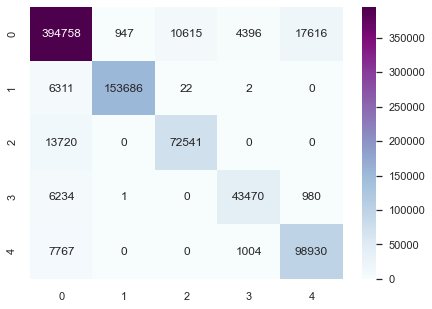

In [ ]:
cm = confusion_matrix(y_test, ch_lessAcc_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu );

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


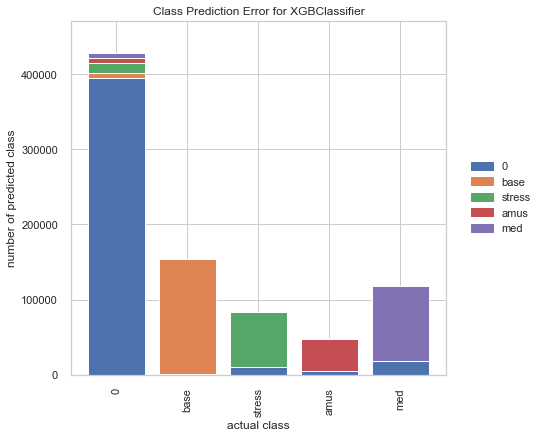

In [ ]:
sns.set(style="whitegrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(ch_lessAcc, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [ ]:
def multiclass_roc_auc_score(y_test, ch_lessAcc_pred, average = 'micro'): 
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(ch_lessAcc_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, ch_lessAcc_pred)

print('All Chest less ACC')
print('-------------------------------')
print("AUC: %.2f%%" % (aucScore*100))

All Chest less ACC
-------------------------------
AUC: 94.78%


### Model ACC: Accelerometer [X,Y,Z] only

In [ ]:
ch_ACC = c_loc[['c_ax', 'c_ay', 'c_az', 'w_label']]
y = ch_ACC.w_label
x = ch_ACC.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 

print(x_train.shape)
print(y_test.shape)

(3332000, 3)
(833000,)


In [ ]:
ACC = XGBClassifier(objective = 'multi:softmax',
                           learning_rate = 0.1,
                           gradient_based = 0.1,
                           early_stopping_rounds = 20,
                           n_estimators = 300,
                           gamma = 3,
                           verbosity = 2) 

model_ACC = ACC.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14:09:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[14:09:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 2 pruned nodes, max_depth=6
[14:09:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 4 pruned nodes, max_depth=6
[14:09:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 18 pruned nodes, max_depth=6
[14:09:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost

[14:09:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 24 pruned nodes, max_depth=6
[6]	validation_0-merror:0.10249	validation_1-merror:0.10175
[14:09:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 4 pruned nodes, max_depth=6
[14:09:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 10 pruned nodes, max_depth=6
[14:09:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 14 pruned nodes, max_depth=6
[14:09:59] INFO: C:/buildkite-agent/bu

[14:10:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 30 pruned nodes, max_depth=6
[13]	validation_0-merror:0.10126	validation_1-merror:0.10049
[14:10:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 8 pruned nodes, max_depth=6
[14:10:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 6 pruned nodes, max_depth=6
[14:10:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 12 pruned nodes, max_depth=6
[14:10:35] INFO: C:/buildkite-agent/bu

[14:11:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 26 pruned nodes, max_depth=6
[20]	validation_0-merror:0.10062	validation_1-merror:0.09990
[14:11:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 8 pruned nodes, max_depth=6
[14:11:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 8 pruned nodes, max_depth=6
[14:11:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 8 pruned nodes, max_depth=6
[14:11:12] INFO: C:/buildkite-agent/bui

[14:11:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 32 pruned nodes, max_depth=6
[27]	validation_0-merror:0.09988	validation_1-merror:0.09911
[14:11:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 28 pruned nodes, max_depth=6
[14:11:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 10 pruned nodes, max_depth=6
[14:11:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 10 pruned nodes, max_depth=6
[14:11:57] INFO: C:/buildkite-agent/bu

[14:12:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 34 pruned nodes, max_depth=6
[34]	validation_0-merror:0.09916	validation_1-merror:0.09845
[14:12:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 20 pruned nodes, max_depth=6
[14:12:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 10 pruned nodes, max_depth=6
[14:12:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 10 pruned nodes, max_depth=6
[14:12:36] INFO: C:/buildkite-agent/bu

[14:13:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 28 pruned nodes, max_depth=6
[41]	validation_0-merror:0.09853	validation_1-merror:0.09793
[14:13:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 16 pruned nodes, max_depth=6
[14:13:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 20 pruned nodes, max_depth=6
[14:13:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 12 pruned nodes, max_depth=6
[14:13:15] INFO: C:/buildkite-agent/bu

[14:13:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 50 pruned nodes, max_depth=6
[48]	validation_0-merror:0.09830	validation_1-merror:0.09769
[14:13:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 34 pruned nodes, max_depth=6
[14:14:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 32 pruned nodes, max_depth=6
[14:14:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 26 pruned nodes, max_depth=6
[14:14:02] INFO: C:/buildkite-agent/bui

[14:14:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 30 pruned nodes, max_depth=6
[55]	validation_0-merror:0.09809	validation_1-merror:0.09752
[14:14:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 22 pruned nodes, max_depth=6
[14:14:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 26 pruned nodes, max_depth=6
[14:14:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 10 pruned nodes, max_depth=6
[14:14:38] INFO: C:/buildkite-agent/bui

[14:15:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 30 pruned nodes, max_depth=6
[62]	validation_0-merror:0.09783	validation_1-merror:0.09727
[14:15:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 22 pruned nodes, max_depth=6
[14:15:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 24 pruned nodes, max_depth=6
[14:15:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 14 pruned nodes, max_depth=6
[14:15:15] INFO: C:/buildkite-agent/bui

[14:15:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 16 pruned nodes, max_depth=6
[69]	validation_0-merror:0.09764	validation_1-merror:0.09710
[14:15:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 20 pruned nodes, max_depth=6
[14:15:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 32 pruned nodes, max_depth=6
[14:16:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 14 pruned nodes, max_depth=6
[14:16:01] INFO: C:/buildkite-agent/bui

[14:16:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 14 pruned nodes, max_depth=6
[76]	validation_0-merror:0.09745	validation_1-merror:0.09694
[14:16:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 30 pruned nodes, max_depth=6
[14:16:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 20 pruned nodes, max_depth=6
[14:16:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 8 pruned nodes, max_depth=6
[14:16:37] INFO: C:/buildkite-agent/buil

[14:17:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 18 pruned nodes, max_depth=6
[83]	validation_0-merror:0.09712	validation_1-merror:0.09661
[14:17:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 16 pruned nodes, max_depth=6
[14:17:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 26 pruned nodes, max_depth=6
[14:17:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 10 pruned nodes, max_depth=6
[14:17:23] INFO: C:/buildkite-agent/bu

[14:18:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 22 pruned nodes, max_depth=6
[90]	validation_0-merror:0.09689	validation_1-merror:0.09643
[14:18:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 4 pruned nodes, max_depth=6
[14:18:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 22 pruned nodes, max_depth=6
[14:18:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 2 pruned nodes, max_depth=6
[14:18:08] INFO: C:/buildkite-agent/buil

[14:18:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 30 pruned nodes, max_depth=6
[97]	validation_0-merror:0.09674	validation_1-merror:0.09629
[14:18:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 4 pruned nodes, max_depth=6
[14:18:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 14 pruned nodes, max_depth=6
[14:18:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:18:46] INFO: C:/buildkite-agent/build

[14:19:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 18 pruned nodes, max_depth=6
[104]	validation_0-merror:0.09661	validation_1-merror:0.09620
[14:19:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 12 pruned nodes, max_depth=6
[14:19:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 22 pruned nodes, max_depth=6
[14:19:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:19:39] INFO: C:/buildkite-agent/bui

[14:20:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 20 pruned nodes, max_depth=6
[111]	validation_0-merror:0.09643	validation_1-merror:0.09603
[14:20:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:20:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 14 pruned nodes, max_depth=6
[14:20:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[14:20:15] INFO: C:/buildkite-agent/buil

[14:20:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 20 pruned nodes, max_depth=6
[118]	validation_0-merror:0.09634	validation_1-merror:0.09596
[14:20:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 6 pruned nodes, max_depth=6
[14:20:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 6 pruned nodes, max_depth=6
[14:20:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:20:51] INFO: C:/buildkite-agent/build

[14:21:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 18 pruned nodes, max_depth=6
[125]	validation_0-merror:0.09623	validation_1-merror:0.09582
[14:21:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 16 pruned nodes, max_depth=6
[14:21:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 10 pruned nodes, max_depth=6
[14:21:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 2 pruned nodes, max_depth=6
[14:21:35] INFO: C:/buildkite-agent/bu

[14:22:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 18 pruned nodes, max_depth=6
[132]	validation_0-merror:0.09609	validation_1-merror:0.09570
[14:22:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:22:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 18 pruned nodes, max_depth=6
[14:22:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 8 pruned nodes, max_depth=6
[14:22:11] INFO: C:/buildkite-agent/buil

[14:22:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 16 pruned nodes, max_depth=6
[139]	validation_0-merror:0.09594	validation_1-merror:0.09557
[14:22:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 4 pruned nodes, max_depth=6
[14:22:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 4 pruned nodes, max_depth=6
[14:22:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:22:55] INFO: C:/buildkite-agent/build

[14:23:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 4 pruned nodes, max_depth=6
[146]	validation_0-merror:0.09576	validation_1-merror:0.09547
[14:23:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 12 pruned nodes, max_depth=6
[14:23:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 20 pruned nodes, max_depth=6
[14:23:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 2 pruned nodes, max_depth=6
[14:23:30] INFO: C:/buildkite-agent/bui

[14:24:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 12 pruned nodes, max_depth=6
[153]	validation_0-merror:0.09562	validation_1-merror:0.09535
[14:24:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:24:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 6 pruned nodes, max_depth=6
[14:24:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6
[14:24:05] INFO: C:/buildkite-agent/build

[14:24:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 18 pruned nodes, max_depth=6
[160]	validation_0-merror:0.09553	validation_1-merror:0.09529
[14:24:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 2 pruned nodes, max_depth=6
[14:24:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 6 pruned nodes, max_depth=6
[14:24:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:24:48] INFO: C:/buildkite-agent/buil

[14:25:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 20 pruned nodes, max_depth=6
[167]	validation_0-merror:0.09546	validation_1-merror:0.09519
[14:25:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 6 pruned nodes, max_depth=6
[14:25:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 6 pruned nodes, max_depth=6
[14:25:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6
[14:25:23] INFO: C:/buildkite-agent/buil

[14:26:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 14 pruned nodes, max_depth=6
[174]	validation_0-merror:0.09538	validation_1-merror:0.09513
[14:26:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 28 pruned nodes, max_depth=6
[14:26:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 6 pruned nodes, max_depth=6
[14:26:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 2 pruned nodes, max_depth=6
[14:26:07] INFO: C:/buildkite-agent/buil

[14:26:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 10 pruned nodes, max_depth=6
[181]	validation_0-merror:0.09532	validation_1-merror:0.09510
[14:26:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 22 pruned nodes, max_depth=6
[14:26:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 20 pruned nodes, max_depth=6
[14:26:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 8 pruned nodes, max_depth=6
[14:26:43] INFO: C:/buildkite-agent/bu

[14:27:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 26 pruned nodes, max_depth=6
[188]	validation_0-merror:0.09526	validation_1-merror:0.09500
[14:27:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 2 pruned nodes, max_depth=6
[14:27:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 10 pruned nodes, max_depth=6
[14:27:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 4 pruned nodes, max_depth=6
[14:27:18] INFO: C:/buildkite-agent/buil

[14:27:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 26 pruned nodes, max_depth=6
[195]	validation_0-merror:0.09521	validation_1-merror:0.09495
[14:27:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 14 pruned nodes, max_depth=6
[14:28:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 10 pruned nodes, max_depth=6
[14:28:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 12 pruned nodes, max_depth=0
[14:28:02] INFO: C:/buildkite-agent/bu

[14:28:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 20 pruned nodes, max_depth=1
[202]	validation_0-merror:0.09513	validation_1-merror:0.09491
[14:28:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 12 pruned nodes, max_depth=6
[14:28:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 30 pruned nodes, max_depth=6
[14:28:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 20 pruned nodes, max_depth=6
[14:28:46] INFO: C:/buildkite-agent/bu

[14:29:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 22 pruned nodes, max_depth=0
[209]	validation_0-merror:0.09511	validation_1-merror:0.09489
[14:29:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 4 pruned nodes, max_depth=6
[14:29:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 22 pruned nodes, max_depth=6
[14:29:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 2 pruned nodes, max_depth=6
[14:29:21] INFO: C:/buildkite-agent/buil

[14:29:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 22 pruned nodes, max_depth=0
[216]	validation_0-merror:0.09505	validation_1-merror:0.09486
[14:30:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 18 pruned nodes, max_depth=6
[14:30:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 26 pruned nodes, max_depth=6
[14:30:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 2 pruned nodes, max_depth=6
[14:30:03] INFO: C:/buildkite-agent/buil

[14:30:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 22 pruned nodes, max_depth=0
[223]	validation_0-merror:0.09502	validation_1-merror:0.09486
[14:30:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 22 pruned nodes, max_depth=6
[14:30:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 6 pruned nodes, max_depth=6
[14:30:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 4 pruned nodes, max_depth=6
[14:30:39] INFO: C:/buildkite-agent/buil

[14:31:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 22 pruned nodes, max_depth=0
[230]	validation_0-merror:0.09496	validation_1-merror:0.09484
[14:31:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 22 pruned nodes, max_depth=0
[14:31:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 16 pruned nodes, max_depth=6
[14:31:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[14:31:14] INFO: C:/buildkite-agent/buil

[14:31:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 20 pruned nodes, max_depth=6
[237]	validation_0-merror:0.09490	validation_1-merror:0.09480
[14:31:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 20 pruned nodes, max_depth=6
[14:31:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 20 pruned nodes, max_depth=6
[14:31:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 26 pruned nodes, max_depth=6
[14:31:57] INFO: C:/buildkite-agent/bu

[14:32:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 16 pruned nodes, max_depth=6
[244]	validation_0-merror:0.09486	validation_1-merror:0.09478
[14:32:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 12 pruned nodes, max_depth=6
[14:32:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 12 pruned nodes, max_depth=6
[14:32:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 10 pruned nodes, max_depth=6
[14:32:32] INFO: C:/buildkite-agent/bu

[14:33:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 22 pruned nodes, max_depth=0
[251]	validation_0-merror:0.09480	validation_1-merror:0.09474
[14:33:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 18 pruned nodes, max_depth=0
[14:33:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 36 pruned nodes, max_depth=6
[14:33:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 6 pruned nodes, max_depth=6
[14:33:15] INFO: C:/buildkite-agent/build

[14:33:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 38 pruned nodes, max_depth=0
[258]	validation_0-merror:0.09478	validation_1-merror:0.09471
[14:33:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 18 pruned nodes, max_depth=0
[14:33:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 30 pruned nodes, max_depth=6
[14:33:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 20 pruned nodes, max_depth=6
[14:33:49] INFO: C:/buildkite-agent/buil

[14:34:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 38 pruned nodes, max_depth=0
[265]	validation_0-merror:0.09474	validation_1-merror:0.09471
[14:34:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 24 pruned nodes, max_depth=6
[14:34:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 12 pruned nodes, max_depth=6
[14:34:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 4 pruned nodes, max_depth=6
[14:34:24] INFO: C:/buildkite-agent/bui

[14:35:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 38 pruned nodes, max_depth=0
[272]	validation_0-merror:0.09472	validation_1-merror:0.09466
[14:35:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 24 pruned nodes, max_depth=6
[14:35:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 30 pruned nodes, max_depth=6
[14:35:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 6 pruned nodes, max_depth=6
[14:35:08] INFO: C:/buildkite-agent/bui

[14:35:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 22 pruned nodes, max_depth=0
[279]	validation_0-merror:0.09469	validation_1-merror:0.09462
[14:35:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:35:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 6 pruned nodes, max_depth=6
[14:35:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 6 pruned nodes, max_depth=6
[14:35:43] INFO: C:/buildkite-agent/build

[14:36:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 22 pruned nodes, max_depth=0
[286]	validation_0-merror:0.09469	validation_1-merror:0.09462
[14:36:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 56 pruned nodes, max_depth=6
[14:36:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 10 pruned nodes, max_depth=6
[14:36:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 4 pruned nodes, max_depth=6
[14:36:17] INFO: C:/buildkite-agent/buil

[14:36:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 22 pruned nodes, max_depth=0
[293]	validation_0-merror:0.09463	validation_1-merror:0.09453
[14:36:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 6 pruned nodes, max_depth=6
[14:36:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 62 pruned nodes, max_depth=6
[14:36:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 30 pruned nodes, max_depth=6
[14:36:52] INFO: C:/buildkite-agent/bui

In [ ]:
ACC_pred = ACC.predict(x_test)
ACC_report = (classification_report(y_test, 
                                         ACC_pred, 
                                         labels=np.unique(ACC_pred),
                                         digits=4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, ACC_pred))
print('---------------------------------------')
print('------------Chest ACC Classification Report------------')
print(ACC_report)

Balanced Accuracy: 0.8902747901240756
---------------------------------------
------------Chest ACC Classification Report------------
              precision    recall  f1-score   support

           0     0.9138    0.9124    0.9131    428979
           1     0.9790    0.9510    0.9648    160459
           2     0.6918    0.6875    0.6896     86143
           3     0.9122    0.9240    0.9180     50505
           4     0.9321    0.9764    0.9538    106914

    accuracy                         0.9055    833000
   macro avg     0.8858    0.8903    0.8879    833000
weighted avg     0.9056    0.9055    0.9055    833000



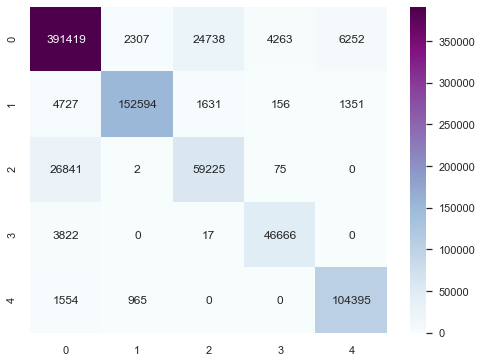

In [ ]:
cm = confusion_matrix(y_test, ACC_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu );

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


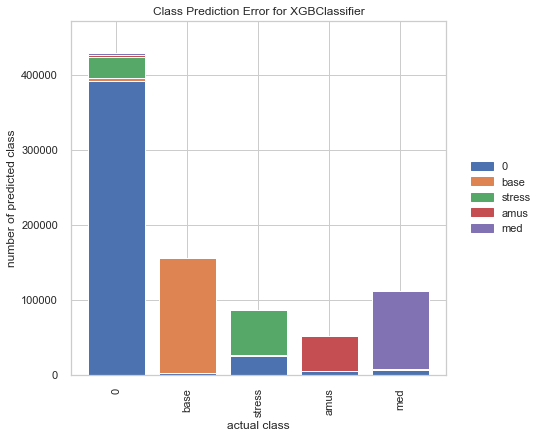

In [ ]:
sns.set(style="whitegrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(ACC, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [ ]:
def multiclass_roc_auc_score(y_test, ACC_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(ACC_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, ACC_pred)

print('Chest Accelerometer')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))  

Chest Accelerometer
-------------------
AUC: 93.04%


### Model Eda: Electrodermal Activity only

In [ ]:
ch_eda= c_loc[['c_eda', 'w_label']]
y = ch_eda.w_label
x = ch_eda.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 

print(x_train.shape)
print(y_test.shape)

(3332000, 1)
(833000,)


In [ ]:
Eda = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 30, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

model_Eda = Eda.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14:37:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[14:37:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 302 extra nodes, 40 pruned nodes, max_depth=10
[14:37:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 206 extra nodes, 42 pruned nodes, max_depth=10
[14:37:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 178 extra nodes, 58 pruned nodes, max_depth=10
[14:37:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xg

[14:38:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 54 pruned nodes, max_depth=10
[6]	validation_0-merror:0.37716	validation_1-merror:0.37768
[14:38:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 264 extra nodes, 74 pruned nodes, max_depth=10
[14:38:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 184 extra nodes, 78 pruned nodes, max_depth=10
[14:38:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 66 pruned nodes, max_depth=10
[14:38:16] INFO: C:/buildkite-ag

[14:38:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 50 pruned nodes, max_depth=10
[13]	validation_0-merror:0.37699	validation_1-merror:0.37760
[14:38:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 216 extra nodes, 102 pruned nodes, max_depth=10
[14:38:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 118 pruned nodes, max_depth=10
[14:38:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 86 pruned nodes, max_depth=10
[14:38:54] INFO: C:/buildkite

[14:39:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 40 pruned nodes, max_depth=10
[20]	validation_0-merror:0.37695	validation_1-merror:0.37764
[14:39:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 94 pruned nodes, max_depth=10
[14:39:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 138 pruned nodes, max_depth=10
[14:39:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 108 pruned nodes, max_depth=10
[14:39:31] INFO: C:/buildkite-a

[14:40:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 84 pruned nodes, max_depth=10
[27]	validation_0-merror:0.37695	validation_1-merror:0.37760
[14:40:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 68 pruned nodes, max_depth=10
[14:40:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 96 pruned nodes, max_depth=10
[14:40:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 126 pruned nodes, max_depth=10
[14:40:32] INFO: C:/buildkite-ag

[14:41:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 120 pruned nodes, max_depth=9
[34]	validation_0-merror:0.37694	validation_1-merror:0.37755
[14:41:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 128 pruned nodes, max_depth=10
[14:41:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 76 pruned nodes, max_depth=10
[14:41:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 168 pruned nodes, max_depth=10
[14:41:14] INFO: C:/buildkite-ag

[14:41:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 86 pruned nodes, max_depth=9
[41]	validation_0-merror:0.37694	validation_1-merror:0.37754
[14:41:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 130 pruned nodes, max_depth=10
[14:41:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 96 pruned nodes, max_depth=10
[14:41:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 102 pruned nodes, max_depth=10
[14:42:00] INFO: C:/buildkite-agen

[14:42:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 62 pruned nodes, max_depth=10
[48]	validation_0-merror:0.37678	validation_1-merror:0.37735
[14:42:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 104 pruned nodes, max_depth=10
[14:42:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 96 pruned nodes, max_depth=10
[14:42:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 100 pruned nodes, max_depth=10
[14:42:47] INFO: C:/buildkite-age

[14:43:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 140 pruned nodes, max_depth=8
[55]	validation_0-merror:0.37678	validation_1-merror:0.37736
[14:43:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 100 pruned nodes, max_depth=10
[14:43:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 146 pruned nodes, max_depth=10
[14:43:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 98 pruned nodes, max_depth=10
[14:43:24] INFO: C:/buildkite-age

[14:44:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 122 pruned nodes, max_depth=8
[62]	validation_0-merror:0.37677	validation_1-merror:0.37736
[14:44:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 90 pruned nodes, max_depth=10
[14:44:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 174 pruned nodes, max_depth=10
[14:44:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 104 pruned nodes, max_depth=10
[14:44:11] INFO: C:/buildkite-age

[14:44:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 144 pruned nodes, max_depth=7
[69]	validation_0-merror:0.37677	validation_1-merror:0.37730
[14:44:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 136 pruned nodes, max_depth=9
[14:44:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 184 pruned nodes, max_depth=10
[14:44:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 76 pruned nodes, max_depth=10
[14:44:58] INFO: C:/buildkite-agen

[14:45:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 118 pruned nodes, max_depth=9
[76]	validation_0-merror:0.37677	validation_1-merror:0.37730
[14:45:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 156 pruned nodes, max_depth=2
[14:45:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 208 pruned nodes, max_depth=10
[14:45:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 88 pruned nodes, max_depth=10
[14:45:36] INFO: C:/buildkite-agent

[14:46:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 98 pruned nodes, max_depth=1
[83]	validation_0-merror:0.37677	validation_1-merror:0.37731
[14:46:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 174 pruned nodes, max_depth=6
[14:46:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 210 pruned nodes, max_depth=2
[14:46:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 144 pruned nodes, max_depth=10
[14:46:34] INFO: C:/buildkite-agent/b

[14:47:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 102 pruned nodes, max_depth=1
[90]	validation_0-merror:0.37677	validation_1-merror:0.37734
[14:47:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 190 pruned nodes, max_depth=0
[14:47:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 186 pruned nodes, max_depth=1
[14:47:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 144 pruned nodes, max_depth=10
[14:47:23] INFO: C:/buildkite-agent/b

[14:48:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 102 pruned nodes, max_depth=1
[97]	validation_0-merror:0.37677	validation_1-merror:0.37734
[14:48:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 168 pruned nodes, max_depth=0
[14:48:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 186 pruned nodes, max_depth=1
[14:48:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 90 pruned nodes, max_depth=3
[14:48:16] INFO: C:/buildkite-agent/buil

In [ ]:
Eda_pred = Eda.predict(x_test)
Eda_report = (classification_report(y_test, 
                                         Eda_pred, 
                                         labels = np.unique(Eda_pred),
                                         digits = 4))
print('Balanced Accuracy:', balanced_accuracy_score(y_test, Eda_pred))
print('---------------------------------------')
print('------------Electrodermal Activity Classification Report------------')
print(Eda_report)

Balanced Accuracy: 0.47714743816109906
---------------------------------------
------------Electrodermal Activity Classification Report------------
              precision    recall  f1-score   support

           0     0.6726    0.7894    0.7263    429048
           1     0.5821    0.4305    0.4950    159837
           2     0.4739    0.3678    0.4142     86054
           3     0.4349    0.1083    0.1734     50664
           4     0.5618    0.6898    0.6192    107397

    accuracy                         0.6227    833000
   macro avg     0.5451    0.4771    0.4856    833000
weighted avg     0.6060    0.6227    0.6023    833000



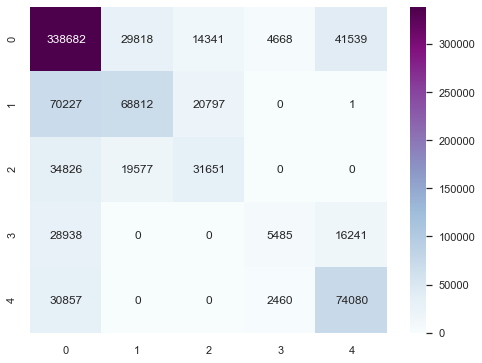

In [ ]:
cm = confusion_matrix(y_test, Eda_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu );

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


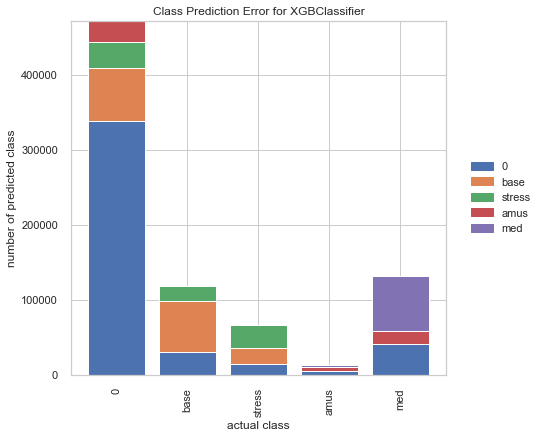

In [ ]:
sns.set(style="whitegrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(Eda, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [ ]:
def multiclass_roc_auc_score(y_test, Eda_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(Eda_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, Eda_pred)

print('EDA Temperature')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))  

EDA Temperature
-------------------
AUC: 67.68%


### Model Temp: Skin Temperature only

In [ ]:
ch_temp = c_loc[['c_temp', 'w_label']]
y = ch_temp.w_label
x = ch_temp.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 

print(x_train.shape)
print(y_test.shape)

(3332000, 1)
(833000,)


In [ ]:
Temp = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 30, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

model_Temp = Temp.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14:48:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[14:48:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 252 extra nodes, 18 pruned nodes, max_depth=10
[14:48:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 16 pruned nodes, max_depth=10
[14:48:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 26 pruned nodes, max_depth=10
[14:48:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xg

[14:49:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 18 pruned nodes, max_depth=10
[6]	validation_0-merror:0.25514	validation_1-merror:0.25582
[14:49:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 202 extra nodes, 58 pruned nodes, max_depth=10
[14:49:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 48 pruned nodes, max_depth=10
[14:49:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 36 pruned nodes, max_depth=10
[14:49:29] INFO: C:/buildkite-ag

[14:50:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 36 pruned nodes, max_depth=10
[13]	validation_0-merror:0.25512	validation_1-merror:0.25577
[14:50:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 76 pruned nodes, max_depth=10
[14:50:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 56 pruned nodes, max_depth=10
[14:50:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 44 pruned nodes, max_depth=10
[14:50:22] INFO: C:/buildkite-ag

[14:51:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 36 pruned nodes, max_depth=10
[20]	validation_0-merror:0.25509	validation_1-merror:0.25570
[14:51:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 70 pruned nodes, max_depth=10
[14:51:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 74 pruned nodes, max_depth=10
[14:51:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 46 pruned nodes, max_depth=9
[14:51:22] INFO: C:/buildkite-agen

[14:52:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 46 pruned nodes, max_depth=10
[27]	validation_0-merror:0.25509	validation_1-merror:0.25566
[14:52:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 50 pruned nodes, max_depth=10
[14:52:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 54 pruned nodes, max_depth=10
[14:52:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 40 pruned nodes, max_depth=9
[14:52:12] INFO: C:/buildkite-agent

[14:52:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 44 pruned nodes, max_depth=10
[34]	validation_0-merror:0.25508	validation_1-merror:0.25567
[14:52:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 44 pruned nodes, max_depth=10
[14:52:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 124 pruned nodes, max_depth=10
[14:52:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 46 pruned nodes, max_depth=10
[14:52:59] INFO: C:/buildkite-age

[14:53:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 50 pruned nodes, max_depth=9
[41]	validation_0-merror:0.25508	validation_1-merror:0.25566
[14:53:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 94 pruned nodes, max_depth=10
[14:53:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 126 pruned nodes, max_depth=9
[14:53:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 48 pruned nodes, max_depth=9
[14:53:49] INFO: C:/buildkite-agent/

[14:54:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 42 pruned nodes, max_depth=9
[48]	validation_0-merror:0.25508	validation_1-merror:0.25566
[14:54:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 100 pruned nodes, max_depth=10
[14:54:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 130 pruned nodes, max_depth=10
[14:54:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 64 pruned nodes, max_depth=7
[14:54:31] INFO: C:/buildkite-agent

[14:55:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 62 pruned nodes, max_depth=8
[55]	validation_0-merror:0.25507	validation_1-merror:0.25570
[14:55:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 130 pruned nodes, max_depth=10
[14:55:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 168 pruned nodes, max_depth=7
[14:55:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 74 pruned nodes, max_depth=7
[14:55:13] INFO: C:/buildkite-agent/

[14:55:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 62 pruned nodes, max_depth=8
[62]	validation_0-merror:0.25508	validation_1-merror:0.25570
[14:55:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 178 pruned nodes, max_depth=10
[14:55:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 170 pruned nodes, max_depth=8
[14:55:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 82 pruned nodes, max_depth=4
[14:55:55] INFO: C:/buildkite-agent/b

[14:56:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 42 pruned nodes, max_depth=8
[69]	validation_0-merror:0.25508	validation_1-merror:0.25570
[14:56:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 192 pruned nodes, max_depth=7
[14:56:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 208 pruned nodes, max_depth=8
[14:56:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 76 pruned nodes, max_depth=3
[14:56:38] INFO: C:/buildkite-agent/bu

[14:57:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 36 pruned nodes, max_depth=10
[76]	validation_0-merror:0.25508	validation_1-merror:0.25570
[14:57:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 186 pruned nodes, max_depth=2
[14:57:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 256 pruned nodes, max_depth=7
[14:57:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 94 pruned nodes, max_depth=2
[14:57:30] INFO: C:/buildkite-agent/bu

In [ ]:
Temp_pred = Temp.predict(x_test)
Temp_report = (classification_report(y_test, 
                                         Temp_pred, 
                                         labels = np.unique(Temp_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, Temp_pred))
print('---------------------------------------')
print('------------Chest Skin Temperature Classification Report------------')
print(Temp_report)

Balanced Accuracy: 0.6451679720025194
---------------------------------------
------------Chest Skin Temperature Classification Report------------
              precision    recall  f1-score   support

           0     0.7876    0.7870    0.7873    428125
           1     0.9406    0.9089    0.9245    160154
           2     0.6141    0.4492    0.5188     86242
           3     0.7683    0.3095    0.4412     50743
           4     0.4978    0.7712    0.6050    107736

    accuracy                         0.7443    833000
   macro avg     0.7217    0.6452    0.6554    833000
weighted avg     0.7604    0.7443    0.7412    833000



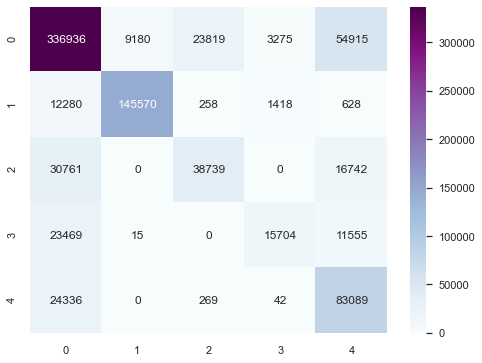

In [ ]:
cm = confusion_matrix(y_test, Temp_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu);

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


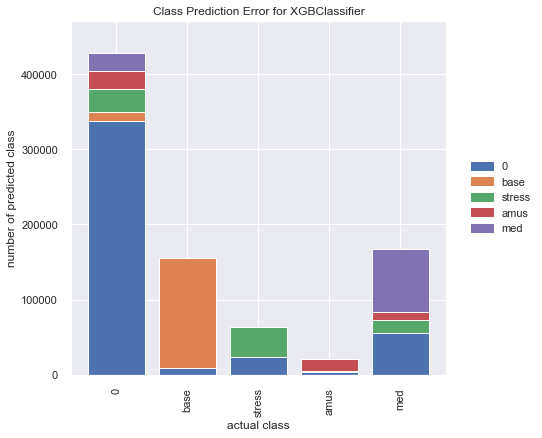

In [ ]:
sns.set(style="darkgrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(Temp, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [ ]:
def multiclass_roc_auc_score(y_test, Temp_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(Temp_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, Temp_pred)

print('Chest Skin Temperature')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))  

Chest Skin Temperature
-------------------
AUC: 78.34%


### Model Resp: Respiration only

In [ ]:
ch_resp = c_loc[['c_resp', 'w_label']]
y = ch_resp.w_label
x = ch_resp.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 

print(x_train.shape)
print(y_test.shape)

(3332000, 1)
(833000,)


In [ ]:
Resp = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 30, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

model_Resp = Resp.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14:57:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[14:57:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 8 pruned nodes, max_depth=10
[14:57:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 110 pruned nodes, max_depth=10
[14:57:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 168 pruned nodes, max_depth=10
[14:57:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/x

[14:58:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 68 pruned nodes, max_depth=10
[6]	validation_0-merror:0.48552	validation_1-merror:0.48562
[14:58:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 14 pruned nodes, max_depth=10
[14:58:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 186 pruned nodes, max_depth=10
[14:58:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 254 pruned nodes, max_depth=10
[14:58:52] INFO: C:/buildkite-ag

[14:59:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 88 pruned nodes, max_depth=10
[13]	validation_0-merror:0.48552	validation_1-merror:0.48562
[14:59:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 44 pruned nodes, max_depth=10
[14:59:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 200 pruned nodes, max_depth=10
[14:59:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 292 pruned nodes, max_depth=10
[14:59:35] INFO: C:/buildkite-a

[15:00:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 132 pruned nodes, max_depth=9
[20]	validation_0-merror:0.48552	validation_1-merror:0.48562
[15:00:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 54 pruned nodes, max_depth=10
[15:00:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 216 pruned nodes, max_depth=10
[15:00:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 266 pruned nodes, max_depth=10
[15:00:37] INFO: C:/buildkite-ag

[15:01:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 150 pruned nodes, max_depth=10
[27]	validation_0-merror:0.48552	validation_1-merror:0.48562
[15:01:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 102 pruned nodes, max_depth=10
[15:01:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 228 pruned nodes, max_depth=10
[15:01:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 336 pruned nodes, max_depth=10
[15:01:30] INFO: C:/buildkite-

[15:02:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 150 pruned nodes, max_depth=9
[34]	validation_0-merror:0.48551	validation_1-merror:0.48561
[15:02:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 126 pruned nodes, max_depth=10
[15:02:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 282 pruned nodes, max_depth=10
[15:02:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 368 pruned nodes, max_depth=10
[15:02:32] INFO: C:/buildkite-ag

[15:03:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 182 pruned nodes, max_depth=8
[41]	validation_0-merror:0.48551	validation_1-merror:0.48561
[15:03:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 188 pruned nodes, max_depth=10
[15:03:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 282 pruned nodes, max_depth=9
[15:03:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 316 pruned nodes, max_depth=10
[15:03:25] INFO: C:/buildkite-age

[15:04:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 192 pruned nodes, max_depth=8
[48]	validation_0-merror:0.48551	validation_1-merror:0.48561
[15:04:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 114 pruned nodes, max_depth=8
[15:04:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 334 pruned nodes, max_depth=9
[15:04:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 422 pruned nodes, max_depth=9
[15:04:17] INFO: C:/buildkite-agent

[15:05:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 200 pruned nodes, max_depth=10
[55]	validation_0-merror:0.48551	validation_1-merror:0.48561
[15:05:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 206 pruned nodes, max_depth=9
[15:05:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 318 pruned nodes, max_depth=10
[15:05:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 358 pruned nodes, max_depth=10
[15:05:10] INFO: C:/buildkite-ag

In [ ]:
Resp_pred = Resp.predict(x_test)
Resp_report = (classification_report(y_test, 
                                         Resp_pred, 
                                         labels = np.unique(Resp_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, Resp_pred))
print('---------------------------------------')
print('------------Chest Respiration Classification Report------------')
print(Resp_report)

Balanced Accuracy: 0.2000290062117427
---------------------------------------
------------Chest Respiration Classification Report------------
              precision    recall  f1-score   support

           0     0.5144    1.0000    0.6793    428472
           1     0.7857    0.0001    0.0001    160540
           2     0.6667    0.0001    0.0002     86161

   micro avg     0.5144    0.6346    0.5682    675173
   macro avg     0.6556    0.3334    0.2265    675173
weighted avg     0.5983    0.6346    0.4312    675173



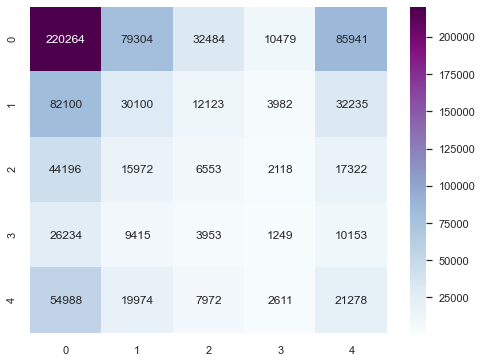

In [ ]:
cm = confusion_matrix(y_test, Temp_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu);

In [ ]:
sns.set(style="darkgrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(Temp, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

ValueError: feature_names mismatch: ['c_temp'] ['c_resp']
expected c_temp in input data
training data did not have the following fields: c_resp

<Figure size 620x450 with 0 Axes>

In [ ]:
def multiclass_roc_auc_score(y_test, Resp_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(Resp_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, Resp_pred)

print('Chest Respiration')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100)) 

### Model ACC TEMP EDA

In [ ]:
less_Emg_Ecg = c_loc[['c_eda', 'c_temp', 'c_ax', 'c_ay', 'c_az', 'w_label']]
y = less_Emg_Ecg.w_label
x = less_Emg_Ecg.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 

print(x_train.shape)
print(y_test.shape)

(3332000, 5)
(833000,)


In [ ]:
accEdaTemp = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)  

model_accEdaTemp = accEdaTemp.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17:19:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[17:19:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 310 extra nodes, 38 pruned nodes, max_depth=10
[17:19:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 18 pruned nodes, max_depth=10
[17:19:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 26 pruned nodes, max_depth=9
[17:19:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgbo

[17:20:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 16 pruned nodes, max_depth=10
[6]	validation_0-merror:0.10914	validation_1-merror:0.10937
[17:20:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 238 extra nodes, 46 pruned nodes, max_depth=10
[17:20:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 24 pruned nodes, max_depth=10
[17:20:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 30 pruned nodes, max_depth=10
[17:20:18] INFO: C:/buildkite-age

[17:20:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 14 pruned nodes, max_depth=10
[13]	validation_0-merror:0.09748	validation_1-merror:0.09765
[17:20:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 190 extra nodes, 56 pruned nodes, max_depth=10
[17:20:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 14 pruned nodes, max_depth=7
[17:20:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 18 pruned nodes, max_depth=10
[17:20:55] INFO: C:/buildkite-agent

[17:21:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 30 pruned nodes, max_depth=10
[20]	validation_0-merror:0.08159	validation_1-merror:0.08173
[17:21:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 62 pruned nodes, max_depth=10
[17:21:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 10 pruned nodes, max_depth=7
[17:21:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 38 pruned nodes, max_depth=8
[17:21:31] INFO: C:/buildkite-agent

[17:22:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 12 pruned nodes, max_depth=10
[27]	validation_0-merror:0.06983	validation_1-merror:0.06998
[17:22:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 64 pruned nodes, max_depth=9
[17:22:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 22 pruned nodes, max_depth=7
[17:22:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 10 pruned nodes, max_depth=10
[17:22:10] INFO: C:/buildkite-agent/

[17:22:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 26 pruned nodes, max_depth=9
[34]	validation_0-merror:0.06343	validation_1-merror:0.06371
[17:22:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 64 pruned nodes, max_depth=10
[17:22:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 92 pruned nodes, max_depth=10
[17:22:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 32 pruned nodes, max_depth=7
[17:22:47] INFO: C:/buildkite-agent

[17:23:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 48 pruned nodes, max_depth=10
[41]	validation_0-merror:0.05210	validation_1-merror:0.05243
[17:23:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 74 pruned nodes, max_depth=10
[17:23:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 34 pruned nodes, max_depth=7
[17:23:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 6 pruned nodes, max_depth=10
[17:23:27] INFO: C:/buildkite-agent/

[17:24:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 30 pruned nodes, max_depth=10
[48]	validation_0-merror:0.04706	validation_1-merror:0.04731
[17:24:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 64 pruned nodes, max_depth=8
[17:24:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 56 pruned nodes, max_depth=7
[17:24:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 46 pruned nodes, max_depth=8
[17:24:04] INFO: C:/buildkite-agent/bu

[17:24:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 40 pruned nodes, max_depth=9
[55]	validation_0-merror:0.04426	validation_1-merror:0.04455
[17:24:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 58 pruned nodes, max_depth=10
[17:24:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 66 pruned nodes, max_depth=7
[17:24:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 50 pruned nodes, max_depth=7
[17:24:56] INFO: C:/buildkite-agent/bu

[17:25:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 66 pruned nodes, max_depth=9
[62]	validation_0-merror:0.04042	validation_1-merror:0.04071
[17:25:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 104 pruned nodes, max_depth=10
[17:25:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 94 pruned nodes, max_depth=7
[17:25:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 44 pruned nodes, max_depth=8
[17:25:36] INFO: C:/buildkite-agent/

[17:26:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 66 pruned nodes, max_depth=10
[69]	validation_0-merror:0.03795	validation_1-merror:0.03820
[17:26:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 118 pruned nodes, max_depth=9
[17:26:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 66 pruned nodes, max_depth=10
[17:26:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 54 pruned nodes, max_depth=10
[17:26:21] INFO: C:/buildkite-agent

[17:26:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 18 pruned nodes, max_depth=7
[76]	validation_0-merror:0.03488	validation_1-merror:0.03515
[17:26:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 208 extra nodes, 140 pruned nodes, max_depth=10
[17:26:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 74 pruned nodes, max_depth=8
[17:26:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 54 pruned nodes, max_depth=7
[17:26:58] INFO: C:/buildkite-agent/

[17:27:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 28 pruned nodes, max_depth=8
[83]	validation_0-merror:0.03276	validation_1-merror:0.03309
[17:27:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 110 pruned nodes, max_depth=10
[17:27:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 66 pruned nodes, max_depth=9
[17:27:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 46 pruned nodes, max_depth=9
[17:27:36] INFO: C:/buildkite-agent/b

[17:28:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 78 pruned nodes, max_depth=8
[90]	validation_0-merror:0.03092	validation_1-merror:0.03129
[17:28:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 126 pruned nodes, max_depth=10
[17:28:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 72 pruned nodes, max_depth=9
[17:28:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 60 pruned nodes, max_depth=7
[17:28:31] INFO: C:/buildkite-agent/b

[17:29:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 74 pruned nodes, max_depth=9
[97]	validation_0-merror:0.02894	validation_1-merror:0.02930
[17:29:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 124 pruned nodes, max_depth=10
[17:29:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 52 pruned nodes, max_depth=7
[17:29:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 80 pruned nodes, max_depth=6
[17:29:08] INFO: C:/buildkite-agent/b

[17:29:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 38 pruned nodes, max_depth=8
[104]	validation_0-merror:0.02786	validation_1-merror:0.02829
[17:29:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 118 pruned nodes, max_depth=10
[17:29:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 78 pruned nodes, max_depth=8
[17:29:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 56 pruned nodes, max_depth=8
[17:29:45] INFO: C:/buildkite-agent

[17:30:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 54 pruned nodes, max_depth=7
[111]	validation_0-merror:0.02700	validation_1-merror:0.02748
[17:30:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 104 pruned nodes, max_depth=8
[17:30:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 84 pruned nodes, max_depth=8
[17:30:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 74 pruned nodes, max_depth=6
[17:30:22] INFO: C:/buildkite-agent/b

[17:30:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 56 pruned nodes, max_depth=5
[118]	validation_0-merror:0.02641	validation_1-merror:0.02684
[17:30:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 136 pruned nodes, max_depth=7
[17:30:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 74 pruned nodes, max_depth=7
[17:30:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 92 pruned nodes, max_depth=7
[17:30:59] INFO: C:/buildkite-agent/b

[17:31:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 48 pruned nodes, max_depth=8
[125]	validation_0-merror:0.02580	validation_1-merror:0.02628
[17:31:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 120 pruned nodes, max_depth=6
[17:31:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 48 pruned nodes, max_depth=10
[17:31:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 58 pruned nodes, max_depth=8
[17:31:35] INFO: C:/buildkite-agent/

[17:32:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 64 pruned nodes, max_depth=10
[132]	validation_0-merror:0.02545	validation_1-merror:0.02596
[17:32:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 214 pruned nodes, max_depth=10
[17:32:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 58 pruned nodes, max_depth=9
[17:32:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 70 pruned nodes, max_depth=7
[17:32:22] INFO: C:/buildkite-agen

[17:33:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 62 pruned nodes, max_depth=7
[139]	validation_0-merror:0.02504	validation_1-merror:0.02555
[17:33:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 172 pruned nodes, max_depth=9
[17:33:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 72 pruned nodes, max_depth=6
[17:33:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 88 pruned nodes, max_depth=7
[17:33:07] INFO: C:/buildkite-agent/b

[17:33:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 20 pruned nodes, max_depth=7
[146]	validation_0-merror:0.02454	validation_1-merror:0.02506
[17:33:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 170 pruned nodes, max_depth=7
[17:33:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 86 pruned nodes, max_depth=7
[17:33:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 46 pruned nodes, max_depth=9
[17:33:44] INFO: C:/buildkite-agent/b

[17:34:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 26 pruned nodes, max_depth=7
[153]	validation_0-merror:0.02388	validation_1-merror:0.02441
[17:34:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 136 pruned nodes, max_depth=9
[17:34:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 90 pruned nodes, max_depth=6
[17:34:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 68 pruned nodes, max_depth=10
[17:34:30] INFO: C:/buildkite-agent

[17:35:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 48 pruned nodes, max_depth=8
[160]	validation_0-merror:0.02342	validation_1-merror:0.02397
[17:35:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 258 pruned nodes, max_depth=10
[17:35:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 54 pruned nodes, max_depth=10
[17:35:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 64 pruned nodes, max_depth=8
[17:35:07] INFO: C:/buildkite-agen

[17:35:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 102 pruned nodes, max_depth=10
[167]	validation_0-merror:0.02301	validation_1-merror:0.02362
[17:35:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 100 pruned nodes, max_depth=10
[17:35:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 60 pruned nodes, max_depth=8
[17:35:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 96 pruned nodes, max_depth=10
[17:35:44] INFO: C:/buildkite-ag

[17:36:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 28 pruned nodes, max_depth=6
[174]	validation_0-merror:0.02263	validation_1-merror:0.02324
[17:36:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 234 pruned nodes, max_depth=9
[17:36:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 102 pruned nodes, max_depth=5
[17:36:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 90 pruned nodes, max_depth=10
[17:36:21] INFO: C:/buildkite-agen

[17:37:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 60 pruned nodes, max_depth=9
[181]	validation_0-merror:0.02232	validation_1-merror:0.02292
[17:37:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 160 pruned nodes, max_depth=10
[17:37:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 86 pruned nodes, max_depth=5
[17:37:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 112 pruned nodes, max_depth=9
[17:37:07] INFO: C:/buildkite-agent

[17:37:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 64 pruned nodes, max_depth=10
[188]	validation_0-merror:0.02210	validation_1-merror:0.02267
[17:37:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 138 pruned nodes, max_depth=6
[17:37:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 78 pruned nodes, max_depth=8
[17:37:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 90 pruned nodes, max_depth=5
[17:37:44] INFO: C:/buildkite-agent/

[17:38:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 48 pruned nodes, max_depth=4
[195]	validation_0-merror:0.02183	validation_1-merror:0.02241
[17:38:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 156 pruned nodes, max_depth=9
[17:38:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 68 pruned nodes, max_depth=6
[17:38:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 102 pruned nodes, max_depth=8
[17:38:21] INFO: C:/buildkite-agent/b

[17:38:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 82 pruned nodes, max_depth=9
[202]	validation_0-merror:0.02162	validation_1-merror:0.02221
[17:38:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 166 pruned nodes, max_depth=9
[17:38:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 40 pruned nodes, max_depth=7
[17:38:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 116 pruned nodes, max_depth=5
[17:38:59] INFO: C:/buildkite-agent/

[17:39:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 58 pruned nodes, max_depth=7
[209]	validation_0-merror:0.02144	validation_1-merror:0.02198
[17:39:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 162 pruned nodes, max_depth=10
[17:39:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 76 pruned nodes, max_depth=8
[17:39:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 104 pruned nodes, max_depth=7
[17:39:36] INFO: C:/buildkite-agent

[17:40:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 24 pruned nodes, max_depth=6
[216]	validation_0-merror:0.02123	validation_1-merror:0.02179
[17:40:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 116 pruned nodes, max_depth=6
[17:40:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 100 pruned nodes, max_depth=7
[17:40:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 96 pruned nodes, max_depth=5
[17:40:15] INFO: C:/buildkite-agent/

[17:40:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 94 pruned nodes, max_depth=7
[223]	validation_0-merror:0.02101	validation_1-merror:0.02157
[17:40:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 190 pruned nodes, max_depth=10
[17:40:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 64 pruned nodes, max_depth=5
[17:40:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 104 pruned nodes, max_depth=8
[17:40:51] INFO: C:/buildkite-agent

[17:41:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 34 pruned nodes, max_depth=6
[230]	validation_0-merror:0.02084	validation_1-merror:0.02142
[17:41:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 130 pruned nodes, max_depth=9
[17:41:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 84 pruned nodes, max_depth=7
[17:41:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 148 pruned nodes, max_depth=8
[17:41:38] INFO: C:/buildkite-agent/

[17:42:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 66 pruned nodes, max_depth=4
[237]	validation_0-merror:0.02067	validation_1-merror:0.02125
[17:42:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 260 pruned nodes, max_depth=9
[17:42:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 66 pruned nodes, max_depth=6
[17:42:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 76 pruned nodes, max_depth=8
[17:42:15] INFO: C:/buildkite-agent/b

[17:42:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 74 pruned nodes, max_depth=9
[244]	validation_0-merror:0.02054	validation_1-merror:0.02109
[17:42:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 154 pruned nodes, max_depth=9
[17:42:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 82 pruned nodes, max_depth=8
[17:42:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 86 pruned nodes, max_depth=6
[17:42:55] INFO: C:/buildkite-agent/b

[17:43:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 34 pruned nodes, max_depth=6
[251]	validation_0-merror:0.02037	validation_1-merror:0.02093
[17:43:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 202 pruned nodes, max_depth=10
[17:43:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 90 pruned nodes, max_depth=5
[17:43:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 108 pruned nodes, max_depth=6
[17:43:32] INFO: C:/buildkite-agent

[17:44:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 82 pruned nodes, max_depth=7
[258]	validation_0-merror:0.02023	validation_1-merror:0.02078
[17:44:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 146 pruned nodes, max_depth=9
[17:44:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 92 pruned nodes, max_depth=5
[17:44:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 78 pruned nodes, max_depth=7
[17:44:09] INFO: C:/buildkite-agent/b

[17:44:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 80 pruned nodes, max_depth=6
[265]	validation_0-merror:0.02010	validation_1-merror:0.02064
[17:44:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 148 pruned nodes, max_depth=8
[17:44:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 90 pruned nodes, max_depth=5
[17:44:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 100 pruned nodes, max_depth=5
[17:44:47] INFO: C:/buildkite-agent/

[17:45:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 86 pruned nodes, max_depth=6
[272]	validation_0-merror:0.01997	validation_1-merror:0.02053
[17:45:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 202 pruned nodes, max_depth=7
[17:45:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 76 pruned nodes, max_depth=7
[17:45:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 80 pruned nodes, max_depth=7
[17:45:24] INFO: C:/buildkite-agent/b

[17:45:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 66 pruned nodes, max_depth=6
[279]	validation_0-merror:0.01980	validation_1-merror:0.02040
[17:45:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 244 pruned nodes, max_depth=9
[17:46:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 70 pruned nodes, max_depth=9
[17:46:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 92 pruned nodes, max_depth=7
[17:46:02] INFO: C:/buildkite-agent/b

[17:46:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 84 pruned nodes, max_depth=7
[286]	validation_0-merror:0.01969	validation_1-merror:0.02028
[17:46:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 152 pruned nodes, max_depth=8
[17:46:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 70 pruned nodes, max_depth=9
[17:46:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 132 pruned nodes, max_depth=9
[17:46:41] INFO: C:/buildkite-agent/

[17:47:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 68 pruned nodes, max_depth=7
[293]	validation_0-merror:0.01958	validation_1-merror:0.02015
[17:47:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 210 pruned nodes, max_depth=6
[17:47:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 84 pruned nodes, max_depth=5
[17:47:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 116 pruned nodes, max_depth=5
[17:47:31] INFO: C:/buildkite-agent/

In [ ]:
accEdaTemp_pred = accEdaTemp.predict(x_test)
accEdaTemp_report = (classification_report(y_test, 
                                         accEdaTemp_pred, 
                                         labels = np.unique(accEdaTemp_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, accEdaTemp_pred))
print('---------------------------------------')
print('------------ACC EDA TEMP Classification Report------------')
print(accEdaTemp_report)

Balanced Accuracy: 0.9803277863298604
---------------------------------------
------------ACC EDA TEMP Classification Report------------
              precision    recall  f1-score   support

           0     0.9837    0.9772    0.9804    428125
           1     0.9974    0.9897    0.9935    160221
           2     0.9497    0.9687    0.9591     86459
           3     0.9731    0.9813    0.9772     50652
           4     0.9678    0.9847    0.9762    107543

    accuracy                         0.9800    833000
   macro avg     0.9743    0.9803    0.9773    833000
weighted avg     0.9801    0.9800    0.9800    833000



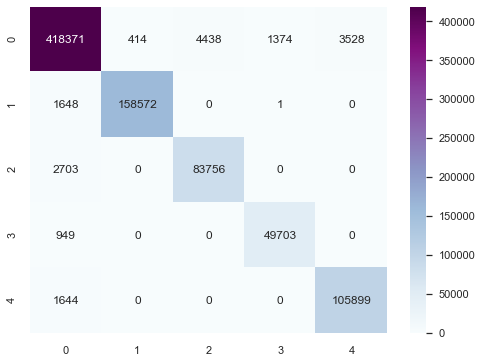

In [ ]:
cm = confusion_matrix(y_test, accEdaTemp_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu );

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


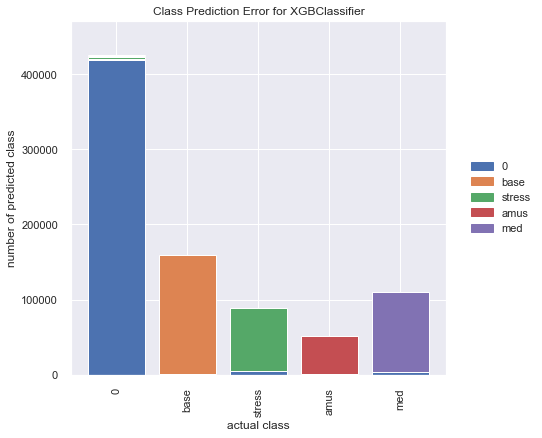

In [ ]:
sns.set(style="darkgrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(accEdaTemp, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [ ]:
def multiclass_roc_auc_score(y_test, accEdaTemp_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(accEdaTemp_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, accEdaTemp_pred)

print('ACC EDA TEMP')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))

ACC EDA TEMP
-------------------
AUC: 98.71%


## KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

### Model shortChest: Less Electromyogram

In [ ]:
ch_short = c_loc[['c_ax', 'c_ay', 'c_az', 'c_eda', 'c_temp', 'c_resp', 'c_ecg', 'w_label']]
y = ch_short.w_label
x = ch_short.drop('w_label',axis=1)

In [ ]:
Q1 = ch_short.quantile(0.25)
Q3 = ch_short.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
ch_short_out = ch_short[~((ch_short < (ch_short - 1.5 * IQR)) |(ch_short > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ch_short_out.shape)

(3330875, 8)


In [ ]:
#mean normalization 
norm_ch_short_out=(ch_short_out-ch_short_out.mean())/ch_short_out.std()
norm_y = ch_short_out.w_label #keep original labels Dont normalize labels
norm_x = norm_ch_short_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [ ]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const      0.000000e+00
c_ax       0.000000e+00
c_ay       0.000000e+00
c_az       0.000000e+00
c_eda      0.000000e+00
c_temp     0.000000e+00
c_resp    4.519407e-233
c_ecg     3.432344e-164
dtype: float64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9418    0.8566    0.8972   1665907
         1.0     0.9929    0.9700    0.9814    574767
         2.0     0.6924    0.9279    0.7931    333528
         3.0     0.8164    0.9178    0.8641    242752
         4.0     0.9064    0.9424    0.9240    513921

    accuracy                         0.9010   3330875
   macro avg     0.8700    0.9229    0.8920   3330875
weighted avg     0.9111    0.9010    0.9030   3330875



### Model ACC TEMP EDA

In [ ]:
less_Emg_Ecg = c_loc[['c_eda', 'c_temp', 'c_ax', 'c_ay', 'c_az', 'w_label']]
y = less_Emg_Ecg.w_label
x = less_Emg_Ecg.drop('w_label',axis=1)

In [ ]:
Q1 = less_Emg_Ecg.quantile(0.25)
Q3 = less_Emg_Ecg.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
less_Emg_Ecg_out = less_Emg_Ecg[~((less_Emg_Ecg < (less_Emg_Ecg - 1.5 * IQR)) |(less_Emg_Ecg > (Q3 + 1.5 * IQR))).any(axis=1)]
print(less_Emg_Ecg_out.shape)

(3584226, 6)


In [ ]:
#mean normalization 
norm_less_Emg_Ecg_out=(less_Emg_Ecg_out-less_Emg_Ecg_out.mean())/less_Emg_Ecg_out.std()
norm_y = less_Emg_Ecg_out.w_label #keep original labels Dont normalize labels
norm_x = norm_less_Emg_Ecg_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [ ]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.0
c_eda     0.0
c_temp    0.0
c_ax      0.0
c_ay      0.0
c_az      0.0
dtype: float64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9383    0.8687    0.9021   1819033
         1.0     0.9596    0.9716    0.9655    603028
         2.0     0.7599    0.9266    0.8350    371402
         3.0     0.8117    0.9210    0.8629    253164
         4.0     0.9053    0.9252    0.9151    537599

    accuracy                         0.9042   3584226
   macro avg     0.8749    0.9226    0.8961   3584226
weighted avg     0.9095    0.9042    0.9050   3584226



## QDA + Normalization + Cross Validation = 10

### Model shortChest: Less Electromyogram

In [ ]:
ch_short = c_loc[['c_ax', 'c_ay', 'c_az', 'c_eda', 'c_temp', 'c_resp', 'c_ecg', 'w_label']]
y = ch_short.w_label
x = ch_short.drop('w_label',axis=1)

In [ ]:
Q1 = ch_short.quantile(0.25)
Q3 = ch_short.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
ch_short_out = ch_short[~((ch_short < (ch_short - 1.5 * IQR)) |(ch_short > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ch_short_out.shape)

(3330875, 8)


In [ ]:
#mean normalization 
norm_ch_short_out=(ch_short_out-ch_short_out.mean())/ch_short_out.std()
norm_y = ch_short_out.w_label #keep original labels Dont normalize labels
norm_x = norm_ch_short_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [ ]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const      0.000000e+00
c_ax       0.000000e+00
c_ay       0.000000e+00
c_az       0.000000e+00
c_eda      0.000000e+00
c_temp     0.000000e+00
c_resp    4.519407e-233
c_ecg     3.432344e-164
dtype: float64

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9267    0.8572    0.8906   1665907
         1.0     0.9744    0.8999    0.9357    574767
         2.0     0.6769    0.9357    0.7856    333528
         3.0     0.8274    0.9212    0.8718    242752
         4.0     0.9314    0.9567    0.9439    513921

    accuracy                         0.8924   3330875
   macro avg     0.8674    0.9141    0.8855   3330875
weighted avg     0.9034    0.8924    0.8947   3330875



### Model ACC TEMP EDA

In [ ]:
less_Emg_Ecg = c_loc[['c_eda', 'c_temp', 'c_ax', 'c_ay', 'c_az', 'w_label']]
y = less_Emg_Ecg.w_label
x = less_Emg_Ecg.drop('w_label',axis=1)

In [ ]:
Q1 = less_Emg_Ecg.quantile(0.25)
Q3 = less_Emg_Ecg.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
less_Emg_Ecg_out = less_Emg_Ecg[~((less_Emg_Ecg < (less_Emg_Ecg - 1.5 * IQR)) |(less_Emg_Ecg > (Q3 + 1.5 * IQR))).any(axis=1)]
print(less_Emg_Ecg_out.shape)

(3584226, 6)


In [ ]:
norm_less_Emg_Ecg_out=(less_Emg_Ecg_out-less_Emg_Ecg_out.mean())/less_Emg_Ecg_out.std()
norm_y = less_Emg_Ecg_out.w_label #keep original labels Dont normalize labels
norm_x = norm_less_Emg_Ecg_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [ ]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.0
c_eda     0.0
c_temp    0.0
c_ax      0.0
c_ay      0.0
c_az      0.0
dtype: float64

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9281    0.8605    0.8930   1819033
         1.0     0.9729    0.9000    0.9350    603028
         2.0     0.6886    0.9359    0.7934    371402
         3.0     0.8212    0.9169    0.8664    253164
         4.0     0.9307    0.9565    0.9434    537599

    accuracy                         0.8933   3584226
   macro avg     0.8683    0.9139    0.8863   3584226
weighted avg     0.9037    0.8933    0.8955   3584226

